# **Assessment 2: Data Science Mini Project**

## Investigating Environmental Drivers of Wildfire Intensity in the UK: Spatial Patterns and Influencing Factors

# **Introduction**

In recent years, large wildfires have been occurring in many regions of the world, notably California, the Amazon, Australia and southern Europe. While these areas have always been vulnerable to wildfires, the effects of climate change are amplifying fire risks worldwide, making unlikely regions, such as the UK, more susceptible to these events (Arnell *et al*., 2021).

Wildfires have long-term environmental effects, by disrupting biodiversity, altering landscape quality and triggering soil erosion (Santi and Rengers, 2022). They pose socioeconomic, public health and security issues, due for instance to the destruction of buildings and the release of carbon contributing to air quality deterioration (Wang *et al*., 2018; Knorr *et al*., 2017). While the UK has seen fewer severe wildfires compared to fire-prone regions, recent incidents have demonstrated the growing fire risks in the UK (Belcher *et al*., 2021). For example, the Swinley Forest fire in 2011 damaged 110 hectares of habitat, threatened nearby residential areas and required significant resources from the fire rescue services (Brown *et al*., 2016). Additionally, cases of fires in British peat lands, which are important carbon stores, have raised concerns of positive feedback to climate change (Davies *et al*., 2016; Milne and Brown, 1997).

Understanding fire dynamics, its spatial patterns and driving factors is essential to fire prevention and the development of effective fire management strategies (Elia *et al*., 2018; Curt *et al*., 2016). Most UK wildfires are caused by inadvertent or deliberate human action (Glaves *et al*., 2020), but the conditions necessary for a fire to become established are environmentally determined. Previous studies have found that fire occurrence, duration, spread and intensity are linked to meteorological conditions (solar radiation, air temperature, precipitation, relative humidity and wind speed), as these influence the drying and wetting of vegetation, which is crucial for flammability (Freeborn *et al.*, 2016). Fires are associated with severe drought conditions, characterized by low levels of precipitation and high temperatures. Global warming intensifies these favourable fire weather conditions, increasing fuel availability, and makes them more frequent, thereby lengthening fire seasons (Smith *et al*., 2020). Anthropogenic activities, such as land cover changes, have also been shown to influence fire behaviour by altering vegetation composition, which in turn affects fuel loads, structure and dryness (Hantson *et al*., 2015).

Though contributing factors and spatial distributions of wildfires have been explored in fire-prone regions like the Amazon and Mexico (Ma *et al*., 2022; Román-Cuesta and Martínez-Vilalta, 2006), fewer studies have examined the UK as it is an “emergent risk” there (Perry *et al*., 2022). Since the relationships between drivers and fire occurrence and behaviour can vary by region (Parisien and Moritz, 2009), it is crucial to explore the unique drivers in the UK to inform local fire mitigation strategies.

This study aims to investigate the environmental factors influencing fire intensity across the UK. We address the following specific objectives: (1) report the spatial distribution of fire occurrences and intensity, (2) examine the relationship between fire intensity and meteorological, topographic as well as land cover factors with an OLS, (3) detect any spatial variation in these relationships, using a geographically weighted regression.


# **Data**

In this study, the data was compiled from different sources. Fire data points were collected from the NASA Fire Information for Resource Management System (FIRMS) website, covering fires that occurred in the UK between the 1st of January 2020 and the 31st of December 2023. The data was collected by the Moderate Resolution Imaging Spectroradiometer (MODIS) with a 1km spatial resolution, aboard the Aqua and Terra satellites. This allowed to collect 2740 fire data points with their coordinates, date of occurrence and Fire Radiative Power (FRP in MW). Each fire data point represents the centre of a 1km pixel containing one or more fires, with the location coordinates corresponding to the pixel’s centre. FRP is a measure of the radiant energy emitted by a fire within a pixel. It is related to biomass combustion and is used as a proxy for fire intensity (Li *et al*., 2018). To map the fires across the UK, geospatial data of the local authority district boundaries in the UK (as of May 2024) were downloaded from the Office for National Statistics. UK geospatial land cover dataset from 2018 with a 100m resolution was sourced from the UK Centre for Ecology & Hydrology, to determine the land cover type at each fire location. The elevation at each fire location was obtained based on its coordinates using the public API from the Open Elevation website. Similarly, weather data was retrieved from the Open Meteo website using a public API. The daily average temperature, total precipitation and average wind speed were extracted, and annual averages and totals were calculated based on the fire location and the year of occurrence.

| Variable                 | Unit           | Description                                                                 | Source               |
|--------------------------|----------------|-----------------------------------------------------------------------------|----------------------|
| latitude                 | Degrees °      | Latitude of centre of 1km fire pixel. Not necessarily the actual location of fire as one or more fires can be detected within the 1km pixel. | NASA FIRMS           |
| longitude                | Degrees °      | Longitude of centre of 1km fire pixel. Not necessarily the actual location of fire as one or more fires can be detected within the 1km pixel. | NASA FIRMS           |
| acq_date                 |                | Date of MODIS acquisition.                                                   | NASA FIRMS           |
| Year                     |                | Year fire occurred based on acq_date.                                        | NASA FIRMS           |
| frp                      | Megawatts (MW) | Fire Radiative Power. The rate of radiative energy emission per time unit from all fires within a pixel. | NASA FIRMS           |
| geometry                 |                | Point geographic location, represented by a pair of coordinates made from the latitude and longitude columns. |                      |
| Land cover               |                | Land cover type in the fire location, in 2018.                               | UKCEH                |
| RGB_color                |                | RGB color code to map land covers.                                          | UKCEH                |
| elevation                | Meters (m)     | Elevation of fire location.                                                  | Open-Elevation API   |
| annual_avg_temp          | Celsius °C     | Annual average temperature in fire location, 2 meters above ground.         | Open-Meteo API       |
| annual_total_precip      | mm             | Sum of annual precipitation (including rain, showers, and snowfall) in fire location. | Open-Meteo API       |
| annual_avg_wind_speed    | Km/h           | Annual average of maximum wind speed and gusts on a day, 10 meters above ground, in fire location. | Open-Meteo API       |
| ID                       |                | ID of individual fires.                                                     |                      |



**Table 1.** Sources and description of variables in the final dataset (df_project).

The response variable of this study is FRP. The 31 explanatory variables of the study include three categories: topography (elevation), meteorology (temperature, precipitation, wind speed) and land cover (27 types) (Table 1). Topography has been shown to influence fire distribution, as the probability of fire occurrence decreases in high elevations (Wood *et al*., 2011). Weather conditions are important determinants of fire intensity by affecting the availability and flammability of fuels, i.e. vegetation. Temperature affects the combustibility of vegetation, as high temperatures increase the likelihood of ignition. Precipitation influences the moisture level of vegetation, with high precipitation reducing flammability (Fares *et al*., 2017; Živanović *et al*., 2020; Westerling, 2008). Wind affects fuel moisture and is linked to fire behaviour by providing additional oxygen to flames and accelerating combustion by pushing fire towards new fuel sources, encouraging its propagation (Beer, 1991). Meteorological data was summarized annually to capture overall climate conditions that influence fire intensity, as vegetation content and amount depend on preceding weather conditions (Perry *et al*., 2022). Additionally, land cover is a predictor of fire intensity as it determines fuel availability depending on the vegetation type (Pereira *et al*., 2014). These explanatory variables have been commonly used before to study fire occurrence, distribution, spread and intensity (Ma *et al*., 2022; Salavati *et al*. 2022; Freeborn *et al*., 2016).

# **Data Collection**

## **Set-up Packages**

In [ ]:
pip install folium matplotlib mapclassify palettable descartes pysal contextily matplotlib_scalebar geopandas

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.

In [ ]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.12.23
    Uninstalling flatbuffers-24.12.23:
      Successfully uninstalled flatbuffers-24.12.23
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import palettable as pltt
from pysal.viz import mapclassify
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib_scalebar.scalebar import ScaleBar
import mapclassify
import matplotlib.patches as mpatches
import requests
import datetime
import json
import openmeteo_requests
import requests_cache
from retry_requests import retry
import math
from shapely import wkt
from scipy.stats import gaussian_kde
from pysal.explore import esda
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
from pysal.lib import weights
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

2.5
2.5
2.5


/usr/local/lib/python3.11/dist-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


## **Set-up fire data**

In [ ]:
#Load UK shape file
UKshp = gpd.read_file('LAD_MAY_2024_UK_BFE.shp')
UKshp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   LAD24CD   361 non-null    object  
 1   LAD24NM   361 non-null    object  
 2   LAD24NMW  22 non-null     object  
 3   BNG_E     361 non-null    int64   
 4   BNG_N     361 non-null    int64   
 5   LONG      361 non-null    float64 
 6   LAT       361 non-null    float64 
 7   geometry  361 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 22.7+ KB


<Axes: >

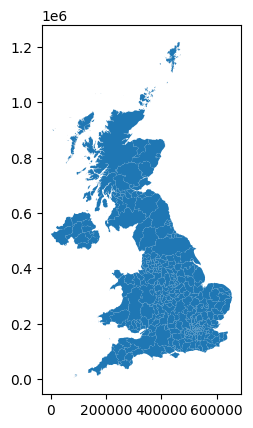

In [ ]:
#Plot UK map
UKshp.plot()

In [ ]:
#Load fire locations data
df_fire = pd.read_csv('fire_archive_M-C61_555109.csv')
df_fire.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   51.5773    -3.7721       300.7   1.1    1.0  2020-01-09      1115   
1   51.5780    -3.7777       311.9   1.2    1.1  2020-01-18      1109   
2   53.5633    -0.5970       306.7   1.0    1.0  2020-01-18      1109   
3   53.5659    -0.5936       301.0   1.0    1.0  2020-01-18      1256   
4   51.5607    -3.7664       300.5   1.4    1.2  2020-01-19      1152   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          36     6.03       280.2   8.2        D     2  
1     Terra      MODIS          54     6.03       277.8  18.9        D     2  
2     Terra      MODIS          64     6.03       277.0  12.5        D     2  
3      Aqua      MODIS          38     6.03       278.5   8.1        D     2  
4     Terra      MODIS           0     6.03       278.9  12.9        D     2

In [ ]:
df_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2741 non-null   float64
 1   longitude   2741 non-null   float64
 2   brightness  2741 non-null   float64
 3   scan        2741 non-null   float64
 4   track       2741 non-null   float64
 5   acq_date    2741 non-null   object 
 6   acq_time    2741 non-null   int64  
 7   satellite   2741 non-null   object 
 8   instrument  2741 non-null   object 
 9   confidence  2741 non-null   int64  
 10  version     2741 non-null   float64
 11  bright_t31  2741 non-null   float64
 12  frp         2741 non-null   float64
 13  daynight    2741 non-null   object 
 14  type        2741 non-null   int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 321.3+ KB


In [ ]:
#Create the GeoDataFrame using coordinates of df_fire
fire_loc = gpd.GeoDataFrame(df_fire, geometry=gpd.points_from_xy(df_fire['longitude'], df_fire['latitude']))

#Set the CRS to WGS84 (EPSG:4326), since the coordinates are in lat/lon and this is the standard for GPS coordinates
fire_loc.set_crs('EPSG:4326', inplace=True)

#Reproject to EPSG:27700 (British National Grid) to align with UK map
fire_loc = fire_loc.to_crs('EPSG:27700')

In [ ]:
#Check the fire locations and UK boundary maps have the same CRS
print(UKshp.crs)  #Check the CRS of the UK shapefile
print(fire_loc.crs)  #Check the CRS of the fire locations

EPSG:27700
EPSG:27700


In [ ]:
#Look at the top of the new dataset
fire_loc.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   51.5773    -3.7721       300.7   1.1    1.0  2020-01-09      1115   
1   51.5780    -3.7777       311.9   1.2    1.1  2020-01-18      1109   
2   53.5633    -0.5970       306.7   1.0    1.0  2020-01-18      1109   
3   53.5659    -0.5936       301.0   1.0    1.0  2020-01-18      1256   
4   51.5607    -3.7664       300.5   1.4    1.2  2020-01-19      1152   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  \
0     Terra      MODIS          36     6.03       280.2   8.2        D     2   
1     Terra      MODIS          54     6.03       277.8  18.9        D     2   
2     Terra      MODIS          64     6.03       277.0  12.5        D     2   
3      Aqua      MODIS          38     6.03       278.5   8.1        D     2   
4     Terra      MODIS           0     6.03       278.9  12.9        D     2   

                        geometry  
0  POINT (277299.377 187981.302)  
1  POINT (276913.248 188068.568)  
2  POINT (493023.329 408324.445)  
3  POINT (493242.799 408618.126)  
4  POINT (277649.726 186125.724)

<Axes: >

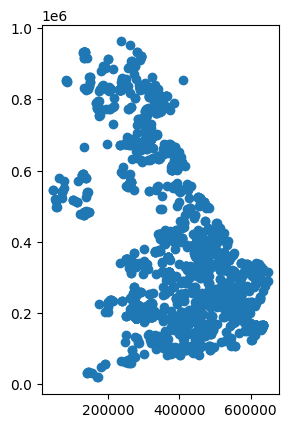

In [ ]:
#Plot the fire locations data (it should look somewhat like the shape of the UK)
fire_loc.plot()

In [ ]:
#Check fire data points align with UK map
#Plot both UK map and fire locations at the same time
def Figure1():
  fig, ax = plt.subplots(1,1, figsize=(10,10), ) #set the figure size
  UKshp.plot(ax = ax, facecolor = 'lightgray') #plot UK map
  fire_loc.plot(ax = ax, color = 'red') #plot fires
  ax.set_axis_off() #remove axes
  fig.suptitle('UK fires') #add a title
  plt.show()

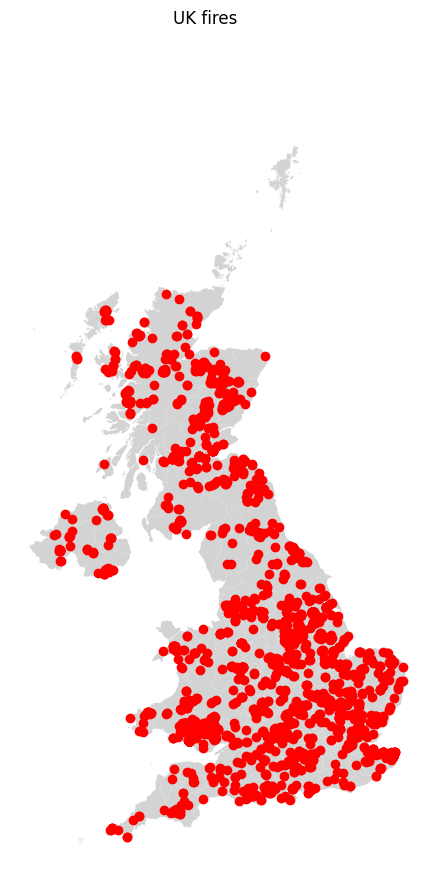

In [ ]:
Figure1()

## **Set-up land cover data**

In [ ]:
#Load land cover data
df_land = gpd.read_file('U2018_CLC2018_V2020_20u1.gpkg')
df_land.head()

OBJECTID Code_18 Remark    Area_Ha  Shape_Length    Shape_Area  \
0    405657     111   None  78.111766   4293.812250  781117.65625   
1    405876     112   None  36.377628   4538.893729  363776.28045   
2    405877     112   None  50.763579   5049.852632  507635.79455   
3    405878     112   None  29.103907   4122.320986  291039.06915   
4    405879     112   None  25.287599   2742.232369  252875.98560   

                                            geometry  
0  POLYGON ((3257415.343 3144163.686, 3257423.546...  
1  POLYGON ((3239579.28 3096932.05, 3239577.86 30...  
2  POLYGON ((3241338.1 3098315.42, 3241317.26 309...  
3  POLYGON ((3247896.976 3100887.343, 3247885.56 ...  
4  POLYGON ((3249047.66 3103775.32, 3248919.12 31...

<Axes: >

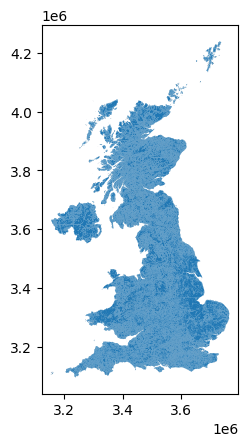

In [ ]:
#Plot the land cover data without differentiating the types (should have map of the UK)
df_land.plot()

In [ ]:
#Check dataset info
df_land.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 74636 entries, 0 to 74635
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      74636 non-null  int32   
 1   Code_18       74636 non-null  object  
 2   Remark        0 non-null      object  
 3   Area_Ha       74636 non-null  float64 
 4   Shape_Length  74636 non-null  float64 
 5   Shape_Area    74636 non-null  float64 
 6   geometry      74636 non-null  geometry
dtypes: float64(3), geometry(1), int32(1), object(2)
memory usage: 3.7+ MB


In [ ]:
#The land cover column named Code_18 should be an integer, as it is the code associated with the land cover type
df_land['Code_18'] = df_land['Code_18'].astype(int)

In [ ]:
#Check CRS of data
print(df_land.crs)

EPSG:3035


In [ ]:
#Change land cover data to EPSG:27700 (British National Grid) to align with UK map
df_land = df_land.to_crs('EPSG:27700')
print(df_land.crs)

EPSG:27700


In this land cover dataset, the column Code_18 corresponds to a land cover type code. The dataset containing the land cover legends, corresponding to each code, needs to be loaded and merged with the land cover dataset.

In [ ]:
#Load the legend dataset
#One of the land cover types contains a comma, causing an issue when loading data set, thus it has to be ignored
df_legend = pd.read_csv('CLC_legend.csv', on_bad_lines='skip')
#and the delimiter has to be redefined
df_legend = pd.read_csv('CLC_legend.csv', delimiter=';')
df_legend.head()

GRID_CODE  CLC_CODE                                      LABEL3  \
0          1       111                     Continuous urban fabric   
1          2       112                  Discontinuous urban fabric   
2          3       121              Industrial or commercial units   
3          4       122  Road and rail networks and associated land   
4          5       123                                  Port areas   

           RGB  
0  230-000-077  
1  255-000-000  
2  204-077-242  
3  204-000-000  
4  230-204-204

In [ ]:
#Check dataset info
df_land.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 74636 entries, 0 to 74635
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      74636 non-null  int32   
 1   Code_18       74636 non-null  int64   
 2   Remark        0 non-null      object  
 3   Area_Ha       74636 non-null  float64 
 4   Shape_Length  74636 non-null  float64 
 5   Shape_Area    74636 non-null  float64 
 6   geometry      74636 non-null  geometry
dtypes: float64(3), geometry(1), int32(1), int64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
#Merge the land cover dataset with its legend using the code columns
df_land_m = df_land.merge(df_legend, how='left', left_on='Code_18', right_on='CLC_CODE')
df_land_m.head()

OBJECTID  Code_18 Remark    Area_Ha  Shape_Length    Shape_Area  \
0    405657      111   None  78.111766   4293.812250  781117.65625   
1    405876      112   None  36.377628   4538.893729  363776.28045   
2    405877      112   None  50.763579   5049.852632  507635.79455   
3    405878      112   None  29.103907   4122.320986  291039.06915   
4    405879      112   None  25.287599   2742.232369  252875.98560   

                                            geometry  GRID_CODE  CLC_CODE  \
0  POLYGON ((180812.765 62185.73, 180826.124 6215...          1       111   
1  POLYGON ((170800.553 12810.329, 170799.203 128...          2       112   
2  POLYGON ((172318.783 14459.238, 172297.624 144...          2       112   
3  POLYGON ((178398.317 18063.945, 178387.444 180...          2       112   
4  POLYGON ((179070.755 21092.923, 178949.937 210...          2       112   

                       LABEL3          RGB  
0     Continuous urban fabric  230-000-077  
1  Discontinuous urban fabric  255-000-000  
2  Discontinuous urban fabric  255-000-000  
3  Discontinuous urban fabric  255-000-000  
4  Discontinuous urban fabric  255-000-000

To use the RGB column and be able to map land covers with their corresponding colors, the format of the RGB column needs to be converted.

In [ ]:
#Create function to convert the 'RGB' (object in format '230-000-077') to hexadecimal color codes '#RRGGBB'
def rgb_to_hex(rgb_string):
    try:
        #Split the string using '-' delimiter and convert to integers
        r, g, b = map(int, rgb_string.split('-'))
        #Convert the integers to hexadecimal format and return it
        return f'#{r:02x}{g:02x}{b:02x}'
    except ValueError:
        #If an error in conversion occurs, return a default gray color
        return '#808080'

#Apply the conversion function to the 'RGB' column
df_land_m['RGB_color'] = df_land_m['RGB'].apply(rgb_to_hex)

#Check dataset
df_land_m.head()

OBJECTID  Code_18 Remark    Area_Ha  Shape_Length    Shape_Area  \
0    405657      111   None  78.111766   4293.812250  781117.65625   
1    405876      112   None  36.377628   4538.893729  363776.28045   
2    405877      112   None  50.763579   5049.852632  507635.79455   
3    405878      112   None  29.103907   4122.320986  291039.06915   
4    405879      112   None  25.287599   2742.232369  252875.98560   

                                            geometry  GRID_CODE  CLC_CODE  \
0  POLYGON ((180812.765 62185.73, 180826.124 6215...          1       111   
1  POLYGON ((170800.553 12810.329, 170799.203 128...          2       112   
2  POLYGON ((172318.783 14459.238, 172297.624 144...          2       112   
3  POLYGON ((178398.317 18063.945, 178387.444 180...          2       112   
4  POLYGON ((179070.755 21092.923, 178949.937 210...          2       112   

                       LABEL3          RGB RGB_color  
0     Continuous urban fabric  230-000-077   #e6004d  
1  Discontinuous urban fabric  255-000-000   #ff0000  
2  Discontinuous urban fabric  255-000-000   #ff0000  
3  Discontinuous urban fabric  255-000-000   #ff0000  
4  Discontinuous urban fabric  255-000-000   #ff0000

The function mapping land covers across the UK will be called in a later section.

In [ ]:
#Plot the land covers with colors based in the RGB_color column
def Figure3():
  fig, ax = plt.subplots(figsize=(10, 10))
  df_land_m.plot(ax=ax, color= df_land_m['RGB_color'])
  ax.set_title('Land Cover Types with RGB Colors', fontsize=16) #Add a title

#Create legend based on the land cover type 'LABEL3' column
#Get the unique land cover types
  unique_types = df_land_m['LABEL3'].unique()

#Create list of patch objects for the legend
  handles = []
  for land_type in unique_types:
    #Get corresponding color for each land cover type
    color = df_land_m[df_land_m['LABEL3'] == land_type]['RGB_color'].iloc[0]
    #Create patch for each land type and its color
    handles.append(mpatches.Patch(color=color, label=land_type))

#Add the legend
  ax.legend(handles=handles, title="Land Cover Type", loc='upper left', bbox_to_anchor=(1.05, 1))

  plt.show()

Next, the dataset is cleaned, and the fire locations and corresponding land covers are spatially joined.

In [ ]:
#Clean fire location dataset to keep only columns used for analysis and plotting
fire_loc = fire_loc[['latitude', 'longitude', 'acq_date','frp', 'geometry' ]]
#Clean land cover dataset to keep only columns used for analysis and plotting
df_land_m = df_land_m[['LABEL3','RGB_color','geometry']]

In [ ]:
#Spatially join the fire dataset with the land cover dataset, to know in which land cover the fire points fall into
#predicate='within' allows to checks if a point (from fire_loc) is within a polygon (from df_land_m)
df_fires = gpd.sjoin(fire_loc, df_land_m, how='left', predicate='within')

#Check
df_fires.head()

latitude  longitude    acq_date   frp                       geometry  \
0   51.5773    -3.7721  2020-01-09   8.2  POINT (277299.377 187981.302)   
1   51.5780    -3.7777  2020-01-18  18.9  POINT (276913.248 188068.568)   
2   53.5633    -0.5970  2020-01-18  12.5  POINT (493023.329 408324.445)   
3   53.5659    -0.5936  2020-01-18   8.1  POINT (493242.799 408618.126)   
4   51.5607    -3.7664  2020-01-19  12.9  POINT (277649.726 186125.724)   

   index_right                          LABEL3 RGB_color  
0      15637.0  Industrial or commercial units   #cc4df2  
1      15637.0  Industrial or commercial units   #cc4df2  
2      16604.0  Industrial or commercial units   #cc4df2  
3      16604.0  Industrial or commercial units   #cc4df2  
4      15637.0  Industrial or commercial units   #cc4df2

In [ ]:
#The acq_date column is in format YYYY-MM-DD, which cannot be used to extract the year
#Convert acq_date to datetime format
df_fires['acq_date'] = pd.to_datetime(df_fires['acq_date'])

#Add a year column based on date column, which will allow to calculate and add annual meteorological data later on
df_fires['Year'] = df_fires['acq_date'].dt.year

#Check the updated dataframe
df_fires.head()

latitude  longitude   acq_date   frp                       geometry  \
0   51.5773    -3.7721 2020-01-09   8.2  POINT (277299.377 187981.302)   
1   51.5780    -3.7777 2020-01-18  18.9  POINT (276913.248 188068.568)   
2   53.5633    -0.5970 2020-01-18  12.5  POINT (493023.329 408324.445)   
3   53.5659    -0.5936 2020-01-18   8.1  POINT (493242.799 408618.126)   
4   51.5607    -3.7664 2020-01-19  12.9  POINT (277649.726 186125.724)   

   index_right                          LABEL3 RGB_color  Year  
0      15637.0  Industrial or commercial units   #cc4df2  2020  
1      15637.0  Industrial or commercial units   #cc4df2  2020  
2      16604.0  Industrial or commercial units   #cc4df2  2020  
3      16604.0  Industrial or commercial units   #cc4df2  2020  
4      15637.0  Industrial or commercial units   #cc4df2  2020

In [ ]:
#Check we have 4 years
df_fires['Year'].unique()

array([2020, 2021, 2022, 2023], dtype=int32)

In [ ]:
#Save new dataset
df_fires.to_csv('df_fires.csv', index=False)

## **Elevation data retrieval using Open-Elevation API**

In [ ]:
#Create function to get elevation data from list of locations (with lat and long)
#Code inspired by the Open Elevation API GitHub documentation

def get_elevation(latitudes, longitudes):
    url = "https://api.open-elevation.com/api/v1/lookup"
    locations = [{"latitude": lat, "longitude": lon} for lat, lon in zip(latitudes, longitudes)] #Create list of coordinates by pairing lat and long (zip function)

    #Send request
    response = requests.post(
        url=url,
        headers={ "Accept": "application/json", "Content-Type": "application/json; charset=utf-8",},
        data=json.dumps({"locations": locations}) )

    #If status code is 200 (i.e. the request was successful), we add the elevation to the results
    if response.status_code == 200:
        result = response.json()
        elevations = [location['elevation'] for location in result['results']]
        return elevations
    else:
        print(f"Error getting elevation data: {response.status_code}") #Print error message if status code is not 200
        return [None] * len(latitudes)

#Create lists out of latitudes and longitudes
latitudes = df_fires['latitude'].tolist()
longitudes = df_fires['longitude'].tolist()

#Get elevations for each fire data point (with pair of latitude and longitude) and add to new column
df_fires['elevation'] = get_elevation(latitudes, longitudes)

In [ ]:
#Check dataframe
#Elevation in meters (m)
df_fires.head()

latitude  longitude   acq_date   frp                       geometry  \
0   51.5773    -3.7721 2020-01-09   8.2  POINT (277299.377 187981.302)   
1   51.5780    -3.7777 2020-01-18  18.9  POINT (276913.248 188068.568)   
2   53.5633    -0.5970 2020-01-18  12.5  POINT (493023.329 408324.445)   
3   53.5659    -0.5936 2020-01-18   8.1  POINT (493242.799 408618.126)   
4   51.5607    -3.7664 2020-01-19  12.9  POINT (277649.726 186125.724)   

   index_right                          LABEL3 RGB_color  Year  elevation  
0      15637.0  Industrial or commercial units   #cc4df2  2020       10.0  
1      15637.0  Industrial or commercial units   #cc4df2  2020       10.0  
2      16604.0  Industrial or commercial units   #cc4df2  2020       21.0  
3      16604.0  Industrial or commercial units   #cc4df2  2020       21.0  
4      15637.0  Industrial or commercial units   #cc4df2  2020        7.0

In [ ]:
#Save new dataset
df_fires_elevation = df_fires.copy()
df_fires_elevation.to_csv('df_fires_elevation.csv', index=False)

## **Weather data retrieval using Open-Meteo API**

In [ ]:
#Check info
df_fires_elevation.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2741 entries, 0 to 2740
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   latitude     2741 non-null   float64       
 1   longitude    2741 non-null   float64       
 2   acq_date     2741 non-null   datetime64[ns]
 3   frp          2741 non-null   float64       
 4   geometry     2741 non-null   geometry      
 5   index_right  2740 non-null   float64       
 6   LABEL3       2740 non-null   object        
 7   RGB_color    2740 non-null   object        
 8   Year         2741 non-null   int32         
 9   elevation    2741 non-null   float64       
dtypes: datetime64[ns](1), float64(5), geometry(1), int32(1), object(2)
memory usage: 289.4+ KB


The dataset is too big (2741 rows) to access weather API, which has hourly call limits. Thus, the dataset is divided into 28 subets (27 sets of 100 rows and 1 set of 41 rows).

In [ ]:
#Divide the dataset into subsets of 100 rows
subs = [df_fires_elevation.iloc[i:i+100] for i in range(0, len(df_fires_elevation), 100)]

#Save each subset into separate CSV files
for idx, subs in enumerate(subs):
    subs.to_csv(f'subset_{idx+1}.csv', index=False)

In [ ]:
#Load subsets
subset_1 = pd.read_csv('subset_1.csv')
subset_2 = pd.read_csv('subset_2.csv')
subset_3 = pd.read_csv('subset_3.csv')
subset_4 = pd.read_csv('subset_4.csv')
subset_5 = pd.read_csv('subset_5.csv')
subset_6 = pd.read_csv('subset_6.csv')
subset_7 = pd.read_csv('subset_7.csv')
subset_8 = pd.read_csv('subset_8.csv')
subset_9 = pd.read_csv('subset_9.csv')
subset_10 = pd.read_csv('subset_10.csv')
subset_11 = pd.read_csv('subset_11.csv')
subset_12 = pd.read_csv('subset_12.csv')
subset_13 = pd.read_csv('subset_13.csv')
subset_14 = pd.read_csv('subset_14.csv')
subset_15 = pd.read_csv('subset_15.csv')
subset_16 = pd.read_csv('subset_16.csv')
subset_17 = pd.read_csv('subset_17.csv')
subset_18 = pd.read_csv('subset_18.csv')
subset_19 = pd.read_csv('subset_19.csv')
subset_20 = pd.read_csv('subset_20.csv')
subset_21 = pd.read_csv('subset_21.csv')
subset_22 = pd.read_csv('subset_22.csv')
subset_23 = pd.read_csv('subset_23.csv')
subset_24 = pd.read_csv('subset_24.csv')
subset_25 = pd.read_csv('subset_25.csv')
subset_26 = pd.read_csv('subset_26.csv')
subset_27 = pd.read_csv('subset_27.csv')
subset_28 = pd.read_csv('subset_28.csv')

A function to collect meteorological data for each fire data point is created, based on its location and year of occurence. The function first collects daily data for the whole year of occurence, then annual averages/totals are calculated.

In [ ]:
#Code inspired by code provided by Open-Meteo API website

#Set up Open-Meteo API with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

#Define url
url = "https://archive-api.open-meteo.com/v1/archive"

#Define parameters we want to collect:
# - daily mean temperature (2m above ground)
# - daily total precipitation in mm
# - daily maximum wind speed (10m above ground)
# - timezone is UK, GMT 0
params = { "daily": ["temperature_2m_mean", "precipitation_sum", "wind_speed_10m_max"],
           "timezone": "GMT"}

#Create function to fetch weather data for each location and year
def fetch_weather_data(lat, lon, year):

    #Set start and end dates based on the year
    start_date = f"{year}-01-01" #1st of Jan
    end_date = f"{year}-12-31" #31st of Dec

    params["latitude"] = lat
    params["longitude"] = lon
    params["start_date"] = start_date
    params["end_date"] = end_date

    try:
        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]

        #Extract daily data from API
        daily = response.Daily()
        daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
        daily_precipitation_sum = daily.Variables(1).ValuesAsNumpy()
        daily_wind_speed_10m_max = daily.Variables(2).ValuesAsNumpy()

        daily_data = {
            "date": pd.date_range(
                start=pd.to_datetime(daily.Time(), unit="s", utc=True),
                end=pd.to_datetime(daily.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=daily.Interval()),
                inclusive="left"
            ),
            "temperature_2m_mean": daily_temperature_2m_mean,
            "precipitation_sum": daily_precipitation_sum,
            "wind_speed_10m_max": daily_wind_speed_10m_max
        }

        daily_dataframe = pd.DataFrame(data=daily_data)

        #Calculate annual means/total
        annual_avg_temp = daily_dataframe["temperature_2m_mean"].mean()
        annual_total_precip = daily_dataframe["precipitation_sum"].sum()
        annual_avg_wind_speed = daily_dataframe["wind_speed_10m_max"].mean()

        return {
            "latitude": lat,
            "longitude": lon,
            "year": year,
            "annual_avg_temp": annual_avg_temp,
            "annual_total_precip": annual_total_precip,
            "annual_avg_wind_speed": annual_avg_wind_speed
        }
    except Exception as e:
        print(f"Error fetching data for {lat}, {lon}, year {year}: {e}")
        return None

A function is created to use the previous function on each row of a dataset.

In [ ]:
#Create function to process each subset and fetch its weather data using previous function
def fetch_weather_subset(df, fetch_weather_data):

    #Create list to store results for each row/location
    weather_results = []

    #Iterate through each row in the subset
    for index, row in df.iterrows():
        lat = row['latitude']
        lon = row['longitude']
        year = row['Year']

        #Fetch weather data using previous function
        result = fetch_weather_data(lat, lon, year)

        #Add result to the list if it is valid
        if result:
            weather_results.append(result)

    #Convert the results into a new subset
    df_weather = pd.DataFrame(weather_results)

    return df_weather

The Open-Meteo API has a time limit of 500 calls per minute. Thus, during the data collection process, the function was called for each of the 28 subsets individually. For the purpose of this report, only the meteorological data of the 1st subset will be retrieved as an example, to prove the code works. The other 27 subsets were run over several days.

In [ ]:
#Call function with the 1st subset and collect its meteorological data
df_weather_subset_1 = fetch_weather_subset(subset_1, fetch_weather_data)
df_weather_subset_1.head()

Error fetching data for 53.0072, -4.2152, year 2020: {'reason': 'Minutely API request limit exceeded. Please try again in one minute.', 'error': True}
Error fetching data for 53.0045, -4.1993, year 2020: {'reason': 'Minutely API request limit exceeded. Please try again in one minute.', 'error': True}
Error fetching data for 52.0504, -4.0216, year 2020: {'reason': 'Minutely API request limit exceeded. Please try again in one minute.', 'error': True}
Error fetching data for 51.5631, -3.7683, year 2020: {'reason': 'Minutely API request limit exceeded. Please try again in one minute.', 'error': True}
Error fetching data for 51.8174, -3.7833, year 2020: {'reason': 'Minutely API request limit exceeded. Please try again in one minute.', 'error': True}
Error fetching data for 51.6581, -3.6545, year 2020: {'reason': 'Minutely API request limit exceeded. Please try again in one minute.', 'error': True}
Error fetching data for 51.8192, -3.7658, year 2020: {'reason': 'Minutely API request limit ex

latitude  longitude  year  annual_avg_temp  annual_total_precip  \
0   51.5773    -3.7721  2020        11.477495          1973.100098   
1   51.5780    -3.7777  2020        11.451496          1973.100098   
2   53.5633    -0.5970  2020        10.508996           721.799988   
3   53.5659    -0.5936  2020        10.502496           721.799988   
4   51.5607    -3.7664  2020        11.483994          1973.100098   

   annual_avg_wind_speed  
0              27.148827  
1              27.148827  
2              24.879877  
3              24.879877  
4              27.148827

In [ ]:
#df_weather_subset_2 = fetch_weather_subset(subset_2, fetch_weather_data)
#df_weather_subset_3 = fetch_weather_subset(subset_3, fetch_weather_data)
#df_weather_subset_4 = fetch_weather_subset(subset_4, fetch_weather_data)
#df_weather_subset_5 = fetch_weather_subset(subset_5, fetch_weather_data)
#df_weather_subset_6 = fetch_weather_subset(subset_6, fetch_weather_data)
#df_weather_subset_7 = fetch_weather_subset(subset_7, fetch_weather_data)
#df_weather_subset_8 = fetch_weather_subset(subset_8, fetch_weather_data)
#df_weather_subset_9 = fetch_weather_subset(subset_9, fetch_weather_data)
#df_weather_subset_10 = fetch_weather_subset(subset_10, fetch_weather_data)
#df_weather_subset_11 = fetch_weather_subset(subset_11, fetch_weather_data)
#df_weather_subset_12 = fetch_weather_subset(subset_12, fetch_weather_data)
#df_weather_subset_13 = fetch_weather_subset(subset_13, fetch_weather_data)
#df_weather_subset_14 = fetch_weather_subset(subset_14, fetch_weather_data)
#df_weather_subset_15 = fetch_weather_subset(subset_15, fetch_weather_data)
#df_weather_subset_16 = fetch_weather_subset(subset_16, fetch_weather_data)
#df_weather_subset_17 = fetch_weather_subset(subset_17, fetch_weather_data)
#df_weather_subset_18 = fetch_weather_subset(subset_18, fetch_weather_data)
#df_weather_subset_19 = fetch_weather_subset(subset_19, fetch_weather_data)
#df_weather_subset_20 = fetch_weather_subset(subset_20, fetch_weather_data)
#df_weather_subset_21 = fetch_weather_subset(subset_21, fetch_weather_data)
#df_weather_subset_22 = fetch_weather_subset(subset_22, fetch_weather_data)
#df_weather_subset_23 = fetch_weather_subset(subset_23, fetch_weather_data)
#df_weather_subset_24 = fetch_weather_subset(subset_24, fetch_weather_data)
#df_weather_subset_25 = fetch_weather_subset(subset_25, fetch_weather_data)
#df_weather_subset_26 = fetch_weather_subset(subset_26, fetch_weather_data)
#df_weather_subset_27 = fetch_weather_subset(subset_27, fetch_weather_data)
#df_weather_subset_28 = fetch_weather_subset(subset_28, fetch_weather_data)

Once meteorological data was collected for all 28 subsets, the subsets were added to a list and combined back into a single dataset.

In [ ]:
#Once the weather data was retrieved, all 28 subsets were added into a list
#subsets = [df_weather_subset_1, df_weather_subset_2, df_weather_subset_3, df_weather_subset_4, df_weather_subset_5,
           #df_weather_subset_6, df_weather_subset_7, df_weather_subset_8, df_weather_subset_9, df_weather_subset_10,
           #df_weather_subset_11, df_weather_subset_12, df_weather_subset_13, df_weather_subset_14, df_weather_subset_15,
           #df_weather_subset_16, df_weather_subset_17, df_weather_subset_18, df_weather_subset_19, df_weather_subset_20,
           #df_weather_subset_21, df_weather_subset_22, df_weather_subset_23, df_weather_subset_24, df_weather_subset_25,
           #df_weather_subset_26, df_weather_subset_27, df_weather_subset_28]

#And combined into one dataset
# df_combined = pd.concat(subsets, axis=0, ignore_index=True)

#Check, should now have 2741 rows
# df_combined.info()

In [ ]:
#Rename year column
# df_combined.rename(columns={'year': 'Year'}, inplace=True)

#Save new dataset
# df_combined.to_csv('df_combined.csv', index=False)

# **Data Wrangling**

We now have the df_combined dataset (containing the meteorogical data) and the df_fires_elevation data (containing the fire and elevation data). The 2 datasets are merged.

In [ ]:
#Load the combined dataset
df_combined = pd.read_csv('df_combined.csv')
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               2741 non-null   float64
 1   longitude              2741 non-null   float64
 2   Year                   2741 non-null   int64  
 3   annual_avg_temp        2741 non-null   float64
 4   annual_total_precip    2741 non-null   float64
 5   annual_avg_wind_speed  2741 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 128.6 KB


As expected all columns contain 2741 rows.

In [ ]:
#Load df_fires_elevation
df_fires_elevation = pd.read_csv('df_fires_elevation.csv')
df_fires_elevation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   latitude     2741 non-null   float64
 1   longitude    2741 non-null   float64
 2   acq_date     2741 non-null   object 
 3   frp          2741 non-null   float64
 4   geometry     2741 non-null   object 
 5   index_right  2740 non-null   float64
 6   LABEL3       2740 non-null   object 
 7   RGB_color    2740 non-null   object 
 8   Year         2741 non-null   int64  
 9   elevation    2741 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 214.3+ KB


The two datasets are merged together based on fire coordinates and year.

In [ ]:
#Merge the df_combined with the df_fires_elevation dataset, using the coordinates and the year
df_project = pd.merge(df_fires_elevation, df_combined, on=['latitude', 'longitude','Year'], how='inner')
#Check, should have 2741 rows
df_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               2747 non-null   float64
 1   longitude              2747 non-null   float64
 2   acq_date               2747 non-null   object 
 3   frp                    2747 non-null   float64
 4   geometry               2747 non-null   object 
 5   index_right            2746 non-null   float64
 6   LABEL3                 2746 non-null   object 
 7   RGB_color              2746 non-null   object 
 8   Year                   2747 non-null   int64  
 9   elevation              2747 non-null   float64
 10  annual_avg_temp        2747 non-null   float64
 11  annual_total_precip    2747 non-null   float64
 12  annual_avg_wind_speed  2747 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 279.1+ KB


There are more rows than expected, as there should be 2741. We need to check for NAs.

In [ ]:
#Check for NAs
df_project.isna().sum()

latitude                 0
longitude                0
acq_date                 0
frp                      0
geometry                 0
index_right              1
LABEL3                   1
RGB_color                1
Year                     0
elevation                0
annual_avg_temp          0
annual_total_precip      0
annual_avg_wind_speed    0
dtype: int64

One row has NAs as it wasn't assigned a land cover type. We choose to remove it.

In [ ]:
df_project = df_project.dropna()
df_project.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2746 entries, 0 to 2746
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               2746 non-null   float64
 1   longitude              2746 non-null   float64
 2   acq_date               2746 non-null   object 
 3   frp                    2746 non-null   float64
 4   geometry               2746 non-null   object 
 5   index_right            2746 non-null   float64
 6   LABEL3                 2746 non-null   object 
 7   RGB_color              2746 non-null   object 
 8   Year                   2746 non-null   int64  
 9   elevation              2746 non-null   float64
 10  annual_avg_temp        2746 non-null   float64
 11  annual_total_precip    2746 non-null   float64
 12  annual_avg_wind_speed  2746 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 300.3+ KB


There are still 6 more rows than expected, we check for duplicates as the merge function may have created some, and delete them.

In [ ]:
#Check for duplicates and show them
duplicated_rows = df_project[df_project.duplicated()]
print(duplicated_rows)

      latitude  longitude    acq_date   frp  \
21     53.5676    -0.5926  2020-02-06  14.0   
460    53.5676    -0.5926  2020-05-06   8.6   
1790   53.5666    -0.5883  2022-04-09   7.5   
2035   53.5666    -0.5883  2022-08-09   7.7   
2337   51.5681    -3.7661  2023-04-15   8.0   
2744   51.5681    -3.7661  2023-11-15  15.4   

                                          geometry  index_right  \
21    POINT (493305.2869129921 408808.55179541203)      16604.0   
460   POINT (493305.2869129921 408808.55179541203)      16604.0   
1790  POINT (493592.2511977317 408702.94236687827)      58369.0   
2035  POINT (493592.2511977317 408702.94236687827)      58369.0   
2337   POINT (277690.3992088825 186948.1451915814)      15637.0   
2744   POINT (277690.3992088825 186948.1451915814)      15637.0   

                              LABEL3 RGB_color  Year  elevation  \
21    Industrial or commercial units   #cc4df2  2020       22.0   
460   Industrial or commercial units   #cc4df2  2020       22.0   

In [ ]:
#Drop the duplicated rows
df_project = df_project.drop_duplicates()
df_project.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2740 entries, 0 to 2746
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               2740 non-null   float64
 1   longitude              2740 non-null   float64
 2   acq_date               2740 non-null   object 
 3   frp                    2740 non-null   float64
 4   geometry               2740 non-null   object 
 5   index_right            2740 non-null   float64
 6   LABEL3                 2740 non-null   object 
 7   RGB_color              2740 non-null   object 
 8   Year                   2740 non-null   int64  
 9   elevation              2740 non-null   float64
 10  annual_avg_temp        2740 non-null   float64
 11  annual_total_precip    2740 non-null   float64
 12  annual_avg_wind_speed  2740 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 299.7+ KB


We now have 2740 rows, as expected.

In [ ]:
#Drop the index_right column which isn't necessary
df_project = df_project.drop('index_right', axis=1)

In [ ]:
#Rename column
df_project.rename(columns={'LABEL3': 'Land cover'}, inplace=True)

In [ ]:
#Add an identifier column
df_project['ID'] = df_project.index

In [ ]:
#Check top of dataset
df_project.head()

latitude  longitude    acq_date   frp  \
0   51.5773    -3.7721  2020-01-09   8.2   
1   51.5780    -3.7777  2020-01-18  18.9   
2   53.5633    -0.5970  2020-01-18  12.5   
3   53.5659    -0.5936  2020-01-18   8.1   
4   51.5607    -3.7664  2020-01-19  12.9   

                                        geometry  \
0  POINT (277299.37716916634 187981.30188711383)   
1    POINT (276913.2477118926 188068.5675176441)   
2   POINT (493023.3294742502 408324.44493578246)   
3     POINT (493242.798741414 408618.1255455698)   
4  POINT (277649.72615977004 186125.72414085217)   

                       Land cover RGB_color  Year  elevation  annual_avg_temp  \
0  Industrial or commercial units   #cc4df2  2020       10.0        11.477495   
1  Industrial or commercial units   #cc4df2  2020       10.0        11.451496   
2  Industrial or commercial units   #cc4df2  2020       21.0        10.508996   
3  Industrial or commercial units   #cc4df2  2020       21.0        10.502496   
4  Industrial or commercial units   #cc4df2  2020        7.0        11.483994   

   annual_total_precip  annual_avg_wind_speed  ID  
0            1973.1001              27.148827   0  
1            1973.1001              27.148827   1  
2             721.8000              24.879877   2  
3             721.8000              24.879877   3  
4            1973.1001              27.148827   4

In [ ]:
#Save the final complete dataset
df_project.to_csv('df_project.csv', index=False)

In [ ]:
#Load final dataset
df_project = pd.read_csv('df_project.csv')

Make sure the geometry column is of class 'geometry'.

In [ ]:
#Convert 'geometry' column from WKT string to shape geometries
df_project['geometry'] = df_project['geometry'].apply(wkt.loads)
df_project['geometry'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2740 entries, 0 to 2739
Series name: geometry
Non-Null Count  Dtype 
--------------  ----- 
2740 non-null   object
dtypes: object(1)
memory usage: 21.5+ KB


In [ ]:
#Convert the DataFrame to a GeoDataFrame
df_project = gpd.GeoDataFrame(df_project, geometry='geometry')
df_project.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   latitude               2740 non-null   float64 
 1   longitude              2740 non-null   float64 
 2   acq_date               2740 non-null   object  
 3   frp                    2740 non-null   float64 
 4   geometry               2740 non-null   geometry
 5   Land cover             2740 non-null   object  
 6   RGB_color              2740 non-null   object  
 7   Year                   2740 non-null   int64   
 8   elevation              2740 non-null   float64 
 9   annual_avg_temp        2740 non-null   float64 
 10  annual_total_precip    2740 non-null   float64 
 11  annual_avg_wind_speed  2740 non-null   float64 
 12  ID                     2740 non-null   int64   
dtypes: float64(7), geometry(1), int64(2), object(3)
memory usage: 278.4+ KB


In [ ]:
#Make sure dataset CRS is on UK grid
df_project.set_crs('EPSG:27700', inplace=True)
print(df_project.crs)

EPSG:27700


We now have the final df_project dataset which will be used for analysis.

# **Statistics and Visualization**

Between 2020 and 2023, a total of 2740 fires were recorded across the UK (Figure 1). The average **Fire Radiative Power** was 18.6 MW. The FRP values ranged from a minimum of 2.3 MW to a maximum of 592.7 MW. Notably, 75% of the fires had a FRP below 17.9 MW, indicating the predominance of lower-intensity fires in the dataset with a few exceptionally high FRP values (Figure 2).

Fires occurred in 26 of the 36 **land cover** types present in the UK (Figure 3). The land cover category with the highest number of fire occurrences was 'Industrial or commercial units' while the categories with the fewest fires were 'Construction sites', 'Port areas', 'Fruit trees and berry plantations', 'Salt marshes' and 'Complex cultivation patterns'. Land covers with no fire occurrences were excluded from the study.

The average **elevation** of fire locations was 125.8m, with most fires occurring below 200m. The **annual average temperature** at fire locations was 10.1°C, with little variation across the UK. As expected, southern regions showed higher annual average temperatures than the north. **Annual total precipitation** averaged 1178mm, with higher rainfall observed along the western coastline. **Annual average wind speed** showed little variation across the UK and averaged at 23 km/h (Figure 4).



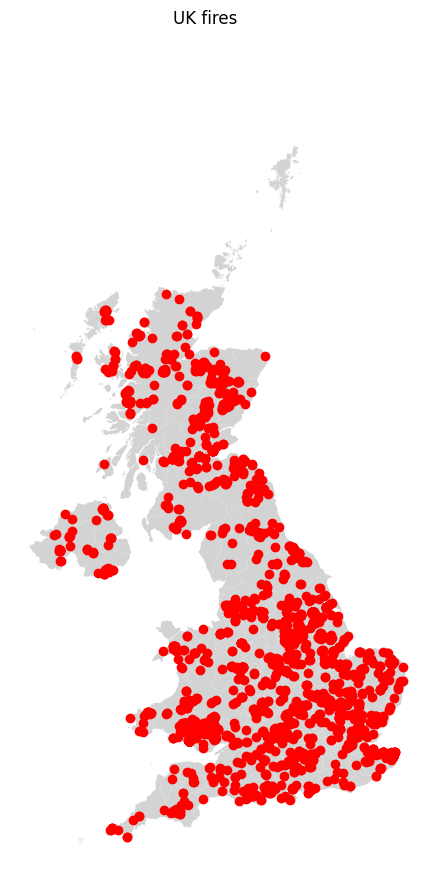

In [ ]:
Figure1()

**Figure 1.** Map of the 2740 fire data points that occured between 2020 and 2023.

In [ ]:
#Describe the fire intensity (Fire Radiative Power)
df_project['frp'].describe()

count    2740.000000
mean       18.635328
std        31.737422
min         2.300000
25%         7.300000
50%        10.800000
75%        17.900000
max       592.700000
Name: frp, dtype: float64

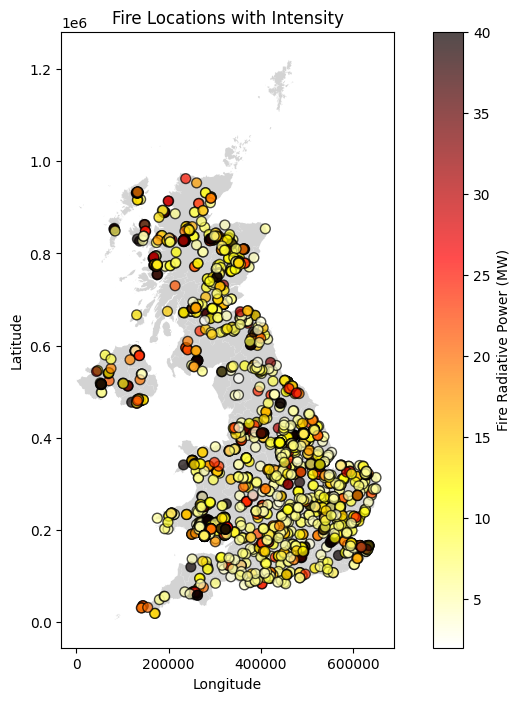

In [ ]:
#Plot fires based on fire intensity (frp)
fig, ax = plt.subplots(figsize=(10, 8))

#Set minimum and maximum values of frp for the color scale
#75% of the values are under 17.9 thus we choose 40 as a maximum
vmin = 2
vmax = 40

#Dot color depends on fire intensity
UKshp.plot(ax=ax , color='lightgray')
scatter = ax.scatter(df_project.geometry.x, df_project.geometry.y,
                     c=df_project['frp'], cmap='hot_r', s=50, edgecolor='k', alpha=0.7,
                     vmin=vmin, vmax=vmax)


# Add color bar to represent intensity
plt.colorbar(scatter, label='Fire Radiative Power (MW)')

#Labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fire Locations with Intensity')

#Show plot
plt.show()

**Figure 2.** Spatial distribution of Fire Radiative Power (MW), the response variable, for fires that occured between 2020 and 2023.

In [ ]:
df_project['Land cover'].value_counts()

Land cover
Industrial or commercial units                                                            829
Non-irrigated arable land                                                                 648
Moors and heathland                                                                       342
Pastures                                                                                  201
Peat bogs                                                                                 197
Natural grasslands                                                                        141
Discontinuous urban fabric                                                                105
Coniferous forest                                                                          69
Broad-leaved forest                                                                        53
Mixed forest                                                                               32
Transitional woodland-shrub                                                                31
Road and rail networks and associated land                                                 19
Sparsely vegetated areas                                                                   16
Airports                                                                                   12
Sport and leisure facilities                                                               12
Land principally occupied by agriculture, with significant areas of natural vegetation      8
Mineral extraction sites                                                                    7
Green urban areas                                                                           4
Continuous urban fabric                                                                     3
Water bodies                                                                                2
Inland marshes                                                                              2
Dump sites                                                                                  2
Construction sites                                                                          1
Port areas                                                                                  1
Fruit trees and berry plantations                                                           1
Salt marshes                                                                                1
Complex cultivation patterns                                                                1
Name: count, dtype: int64

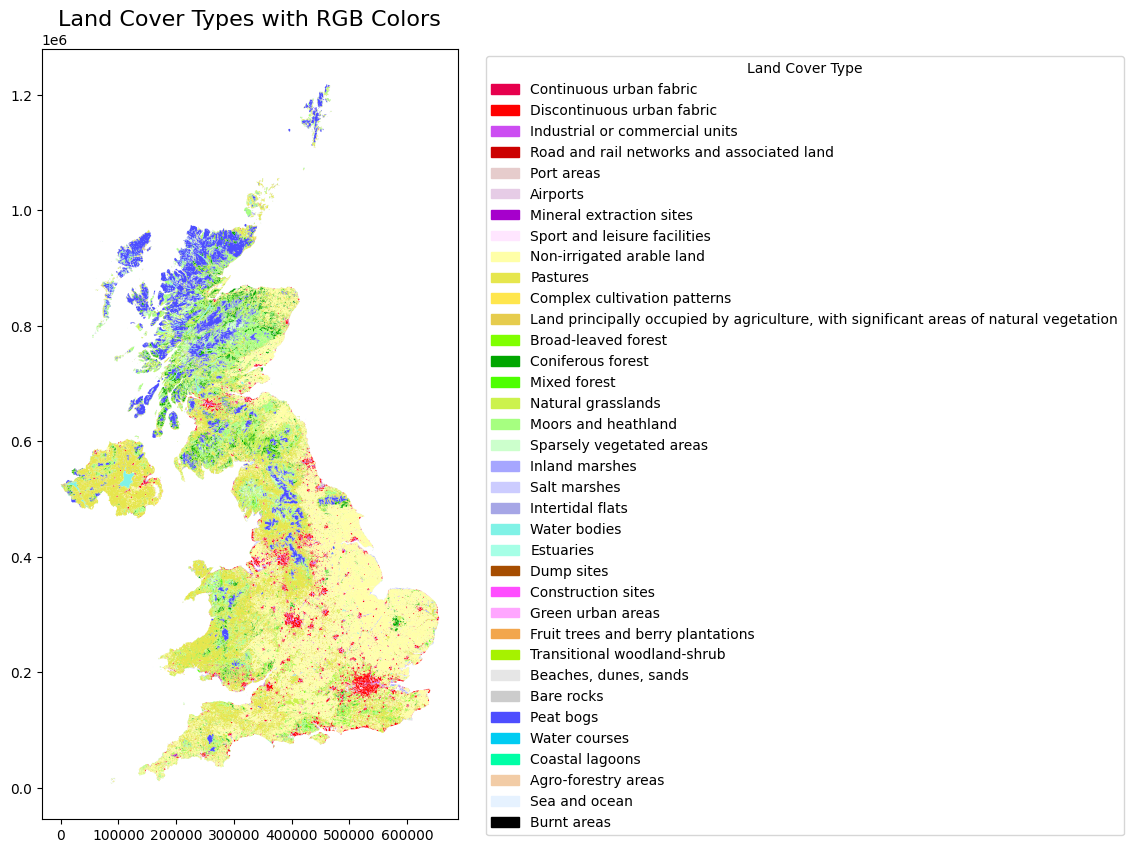

In [ ]:
Figure3()

**Figure 3.** Map of the 36 different land covers present in the UK in 2018.

In [ ]:
#Describe Elevation
df_project['elevation'].describe()

count    2740.000000
mean      125.798175
std       149.570337
min        -1.000000
25%        18.000000
50%        52.000000
75%       200.000000
max       861.000000
Name: elevation, dtype: float64

In [ ]:
#Describe Annual Average Temperature
df_project['annual_avg_temp'].describe()

count    2740.000000
mean       10.107091
std         1.436193
min         3.812724
25%         9.121042
50%        10.523363
75%        11.086991
max        12.425003
Name: annual_avg_temp, dtype: float64

In [ ]:
#Describe Annual Total Precipitation
df_project['annual_total_precip'].describe()

count    2740.000000
mean     1178.826068
std       522.333806
min       541.400000
25%       739.400000
50%       976.049980
75%      1567.600000
max      3397.100000
Name: annual_total_precip, dtype: float64

In [ ]:
#Describe Annual Average Wind Speed
df_project['annual_avg_wind_speed'].describe()

count    2740.000000
mean       23.058774
std         2.206586
min        15.107414
25%        21.699247
50%        23.130695
75%        24.713354
max        34.837376
Name: annual_avg_wind_speed, dtype: float64

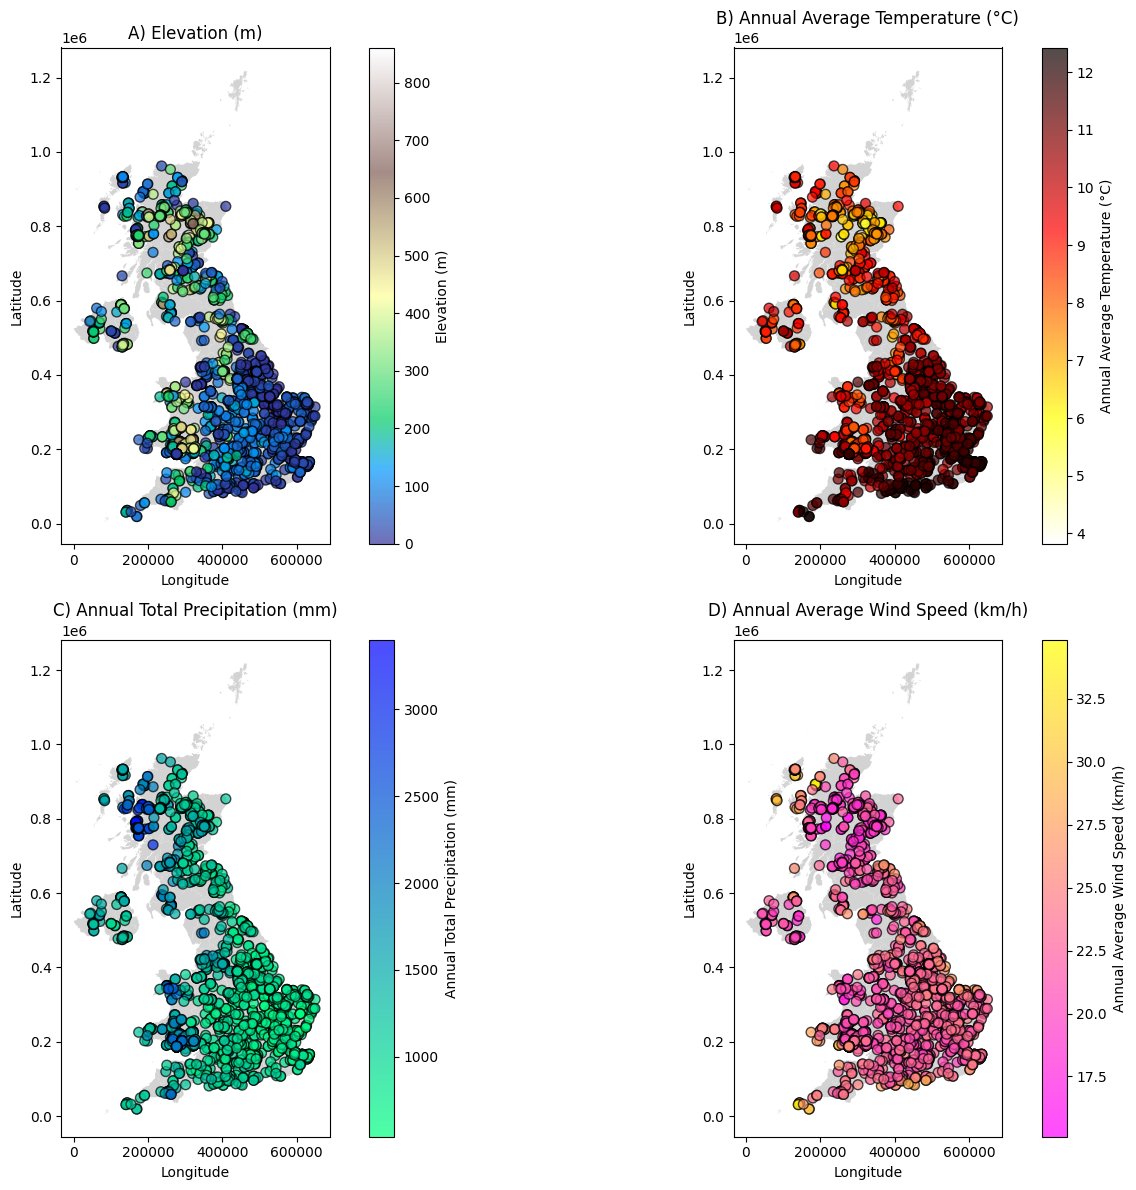

In [ ]:
#Plot with 4 subplots, showing distribution of the 4 explanatory variables

#Create 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

#Plot 1: Elevation
UKshp.plot(ax=axs[0, 0], color='lightgray')
scatter = axs[0, 0].scatter(df_project.geometry.x, df_project.geometry.y,
                            c=df_project['elevation'], cmap='terrain', s=50, edgecolor='k', alpha=0.7)

axs[0, 0].set_xlabel('Longitude')
axs[0, 0].set_ylabel('Latitude')
axs[0, 0].set_title('A) Elevation (m)')
plt.colorbar(scatter, ax=axs[0, 0], label='Elevation (m)')

#Plot 2: Annual Average Temperature
UKshp.plot(ax=axs[0, 1], color='lightgray')
scatter = axs[0, 1].scatter(df_project.geometry.x, df_project.geometry.y,
                             c=df_project['annual_avg_temp'], cmap='hot_r', s=50, edgecolor='k', alpha=0.7)
axs[0, 1].set_xlabel('Longitude')
axs[0, 1].set_ylabel('Latitude')
axs[0, 1].set_title('B) Annual Average Temperature (°C)')
plt.colorbar(scatter, ax=axs[0, 1], label='Annual Average Temperature (°C)')

#Plot 3: Annual Total Precipitation
UKshp.plot(ax=axs[1, 0], color='lightgray')
scatter = axs[1, 0].scatter(df_project.geometry.x, df_project.geometry.y,
                            c=df_project['annual_total_precip'], cmap='winter_r', s=50, edgecolor='k', alpha=0.7)
axs[1, 0].set_xlabel('Longitude')
axs[1, 0].set_ylabel('Latitude')
axs[1, 0].set_title('C) Annual Total Precipitation (mm)')
plt.colorbar(scatter, ax=axs[1, 0], label='Annual Total Precipitation (mm)')

#Plot 4: Annual Average Wind Speed
UKshp.plot(ax=axs[1, 1], color='lightgray')
scatter = axs[1, 1].scatter(df_project.geometry.x, df_project.geometry.y,
                            c=df_project['annual_avg_wind_speed'], cmap='spring', s=50, edgecolor='k', alpha=0.7)
axs[1, 1].set_xlabel('Longitude')
axs[1, 1].set_ylabel('Latitude')
axs[1, 1].set_title('D) Annual Average Wind Speed (km/h)')
plt.colorbar(scatter, ax=axs[1, 1], label='Annual Average Wind Speed (km/h)')

#Adjust layout and show
plt.tight_layout()
plt.show()

**Figure 4.** Spatial distribution of the explanatory variables between 2020 and 2023. A) Elevation B) Annual average temperature C) Annual total precipitation D) Annual average wind speed.

# **Data Analysis**

### **Part 1: Exploring the data.**

The maximum FRP value seems very high compared to the mean and may be an outlier.

Text(0, 0.5, 'Frequency')

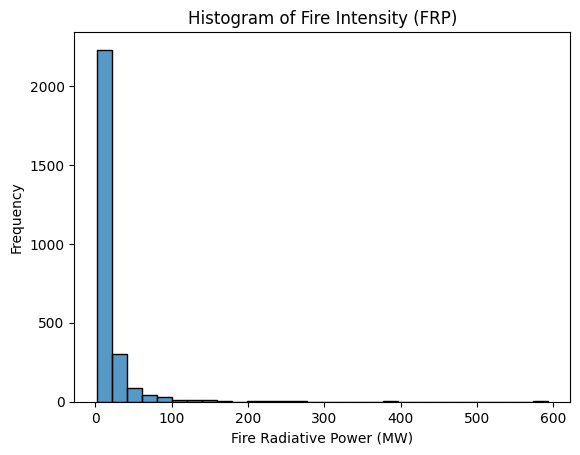

In [ ]:
#Plot frp distribution
sns.histplot(df_project['frp'], bins=30)
plt.title('Histogram of Fire Intensity (FRP)')
plt.xlabel('Fire Radiative Power (MW)')
plt.ylabel('Frequency')

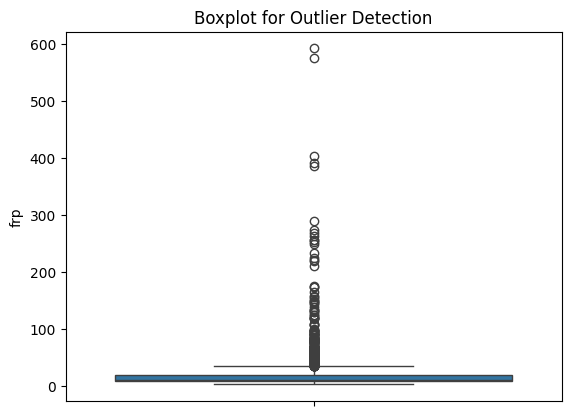

In [ ]:
#Boxplot frp to spot outliers
sns.boxplot(data=df_project, y='frp')
plt.title('Boxplot for Outlier Detection')
plt.show()

In [ ]:
#Show the top 10 rows with the highest 'frp' values
top_10_fires = df_project.nlargest(10, 'frp')
print(top_10_fires)

      latitude  longitude    acq_date    frp                       geometry  \
1981   51.1536    -0.7329  2022-07-24  592.7  POINT (488715.566 140134.422)   
1817   51.2583    -0.6906  2022-04-23  575.1  POINT (491466.478 151829.362)   
1740   51.8659    -3.6604  2022-03-27  403.4   POINT (285769.55 219894.794)   
1741   51.8695    -3.6553  2022-03-27  390.5  POINT (286129.791 220287.164)   
2451   57.2948    -4.7716  2023-05-30  386.6  POINT (233085.912 826088.989)   
1744   58.1948    -6.5601  2022-03-27  288.6  POINT (132138.849 931957.591)   
2453   57.2901    -4.7744  2023-05-30  274.1  POINT (232895.916 825572.897)   
1388   53.4050    -0.5795  2022-01-30  268.9  POINT (494533.242 390737.465)   
2400   53.5836    -1.9723  2023-05-03  263.1  POINT (401931.323 409668.232)   
1977   52.3344     1.0796  2022-07-24  256.1  POINT (609914.916 275166.238)   

                     Land cover RGB_color  Year  elevation  annual_avg_temp  \
1981        Moors and heathland   #a6ff80  2022    

The maximum FRP value corresponds to a major fire which occured on the 24th of July 2022 in Hankley Common, burning 50 acres. Thus, this is not an error and should not be removed for now.

Visualize fire intensity depending on the land cover, then depending on land cover with yearly comparisons.

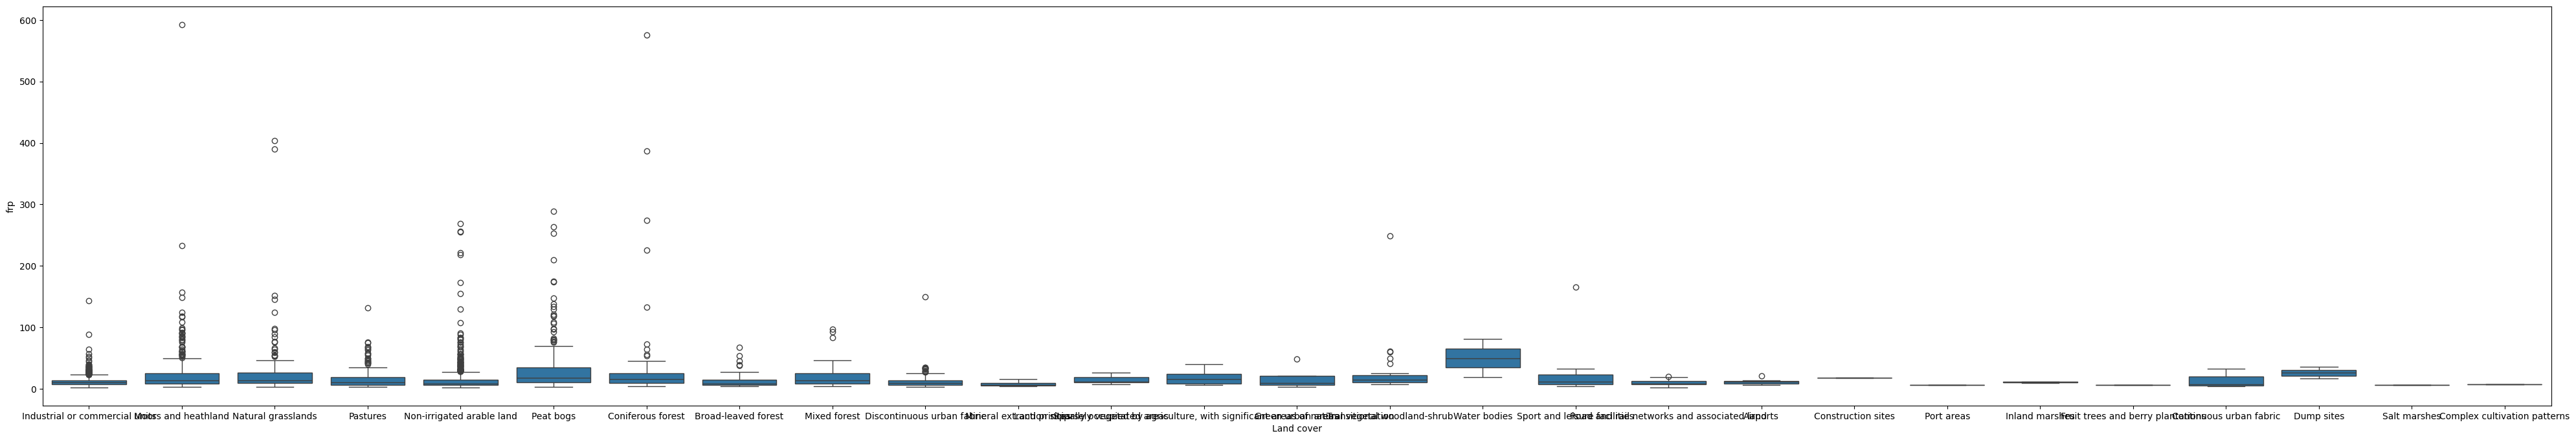

In [ ]:
#Plot fire intensity by land cover type
plt.figure(figsize=(50, 8))
sns.boxplot(data=df_project, x='Land cover', y='frp')
plt.show()

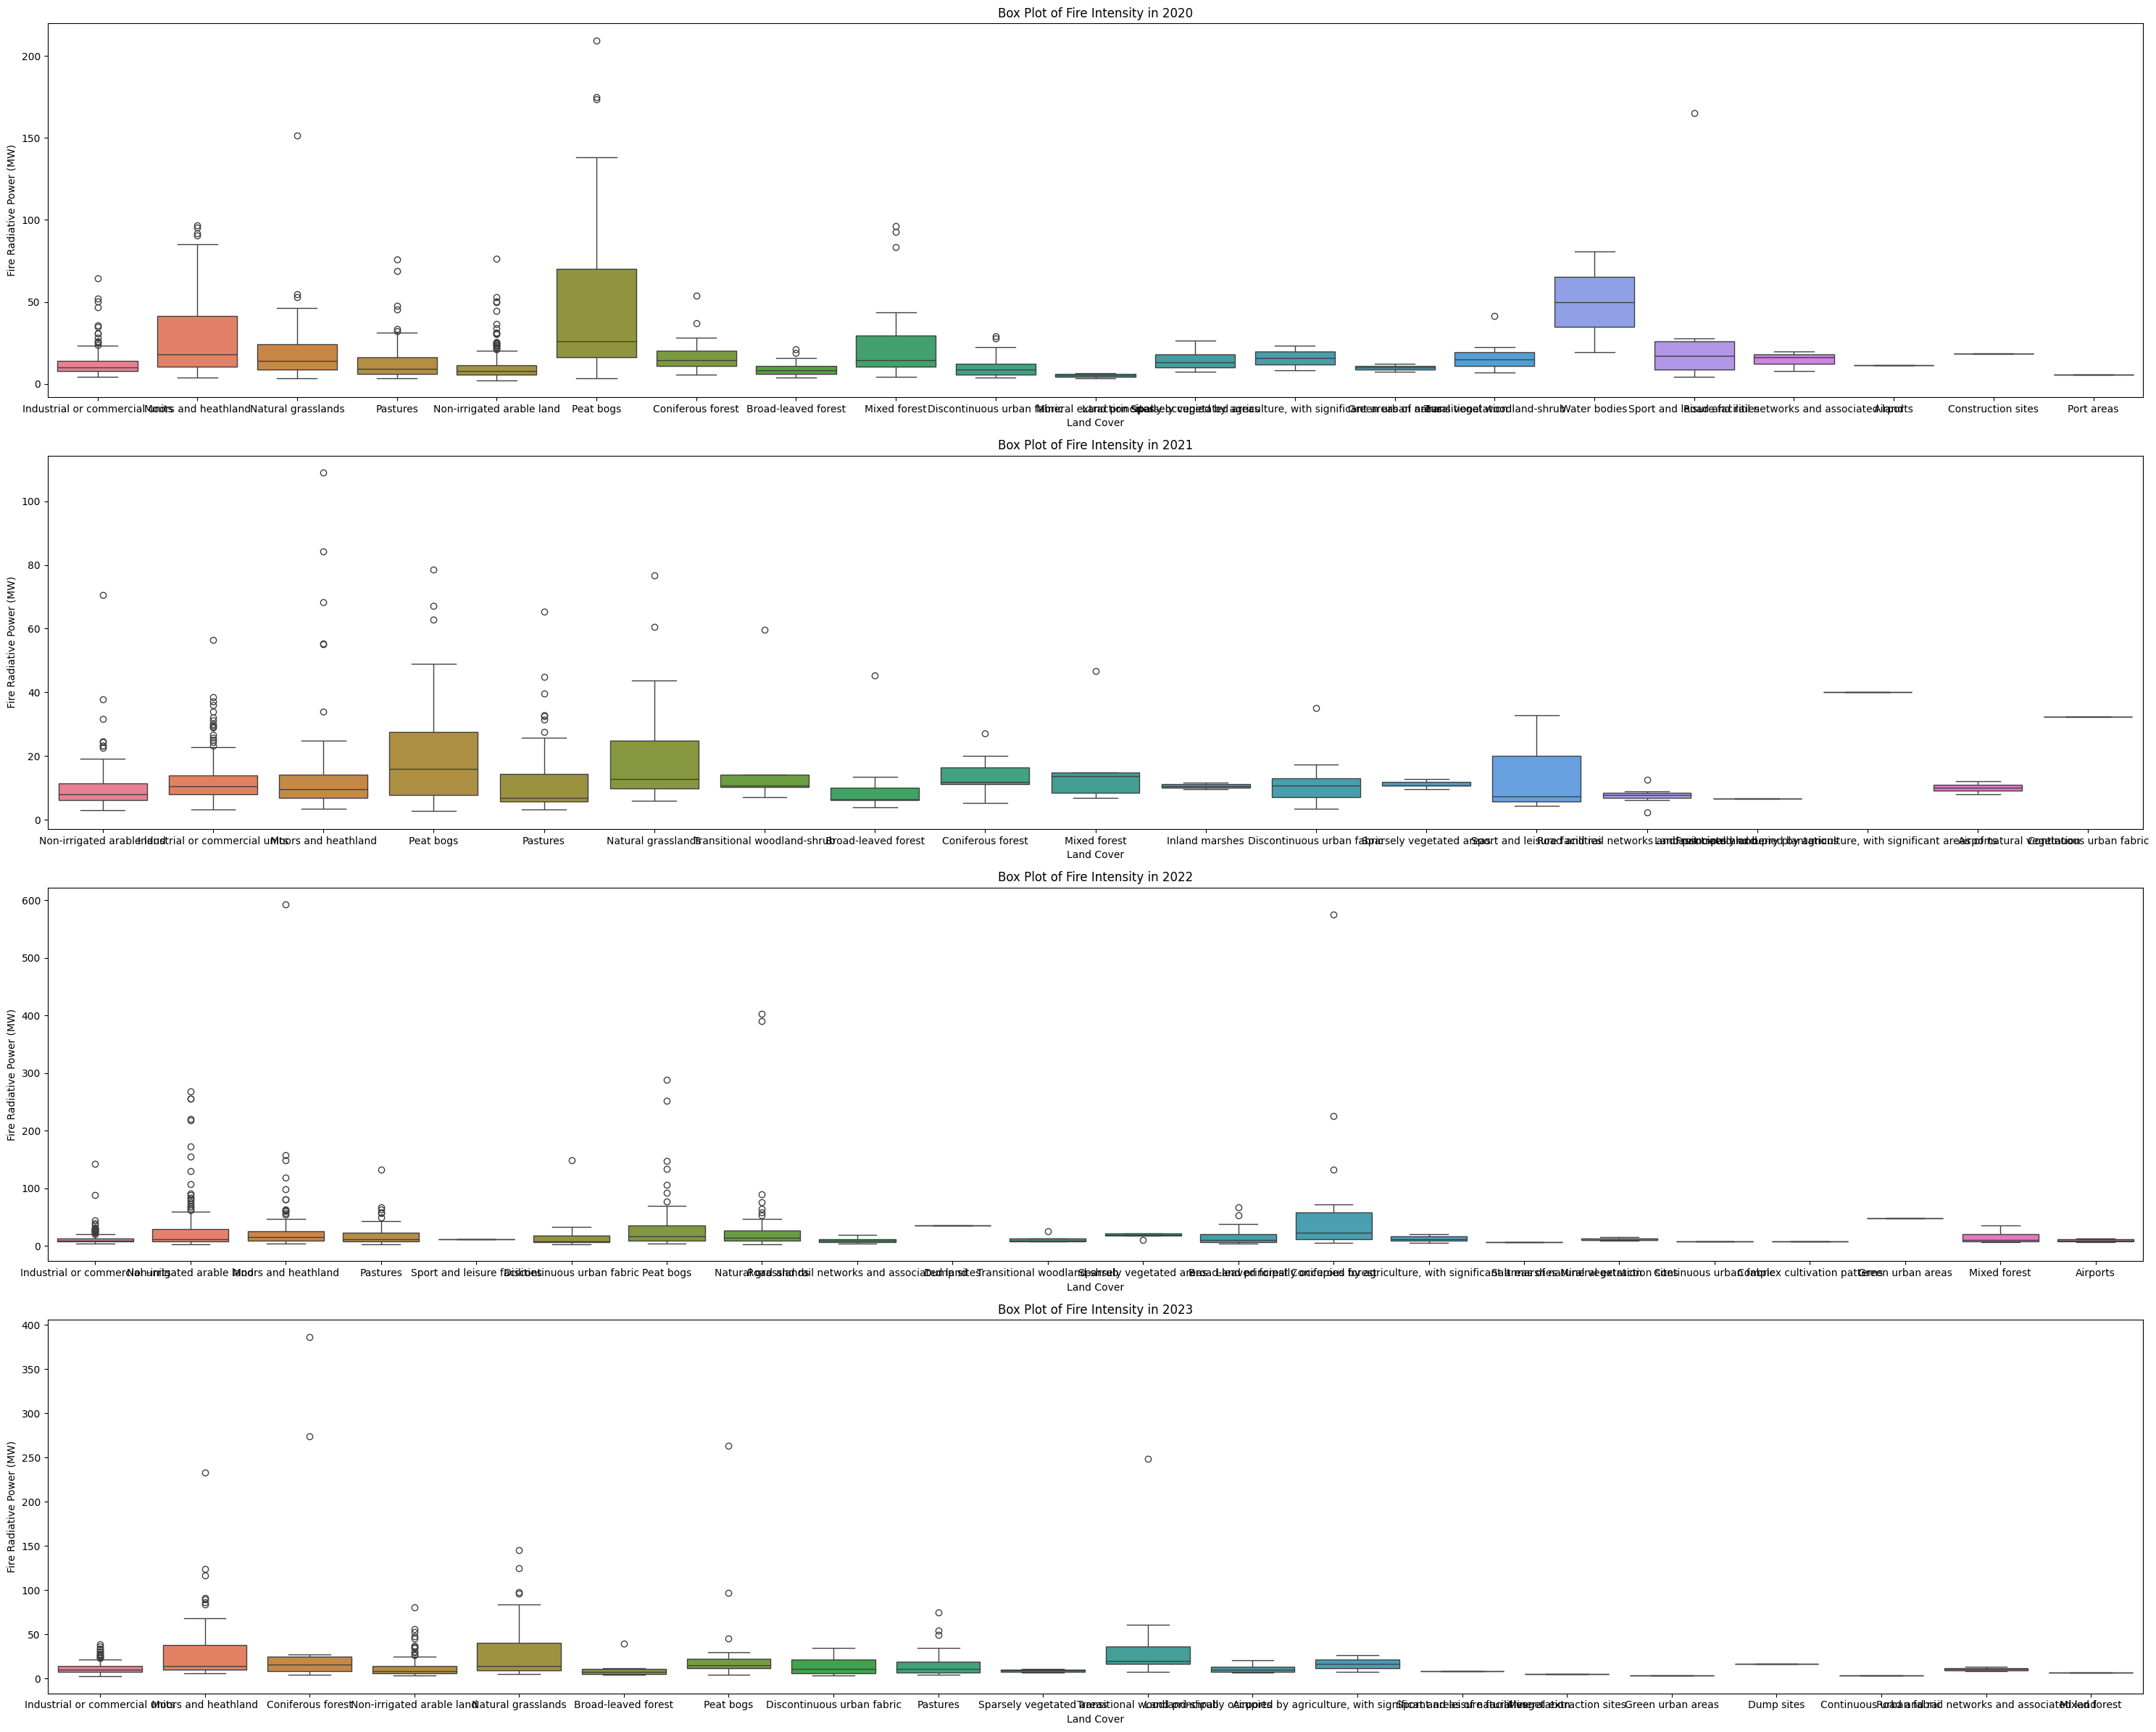

In [ ]:
#Plot fire intensity by land cover type for annual comparison

#Get unique years
years = df_project['Year'].unique()

#Create larger figure with vertical subplots
fig, axes = plt.subplots(len(years), 1, figsize=(30, 6 * len(years)))

#Loop through each year and create boxplot for each
for i, year in enumerate(years):
    #Filter data for the specific year
    data_year = df_project[df_project['Year'] == year]

    #Create boxplot for year on its subplot (axes[i])
    sns.boxplot(data=data_year, x='Land cover', y='frp', hue='Land cover', ax=axes[i])

    #Specify titles and labels
    axes[i].set_title(f'Box Plot of Fire Intensity in {year}')
    axes[i].set_xlabel('Land Cover')
    axes[i].set_ylabel('Fire Radiative Power (MW)')

#Adjust layout to avoid overlap
plt.tight_layout()

#Show plot
plt.show()

Create dummy variables out of the land cover columns. Converting these to numerical values allows to include them in OLS models in the analysis.

In [ ]:
#Create set of dummies
#Each column of dummy land cover type will be boolean, where True indicates that the row has that specific land type value
dummies = pd.get_dummies(df_project['Land cover'], prefix='Lc_')

#Convert boolean dummy columns to binary (0/1)
dummies = dummies.astype(int)

#Check
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 27 columns):
 #   Column                                                                                      Non-Null Count  Dtype
---  ------                                                                                      --------------  -----
 0   Lc__Airports                                                                                2740 non-null   int64
 1   Lc__Broad-leaved forest                                                                     2740 non-null   int64
 2   Lc__Complex cultivation patterns                                                            2740 non-null   int64
 3   Lc__Coniferous forest                                                                       2740 non-null   int64
 4   Lc__Construction sites                                                                      2740 non-null   int64
 5   Lc__Continuous urban fabric                            

Create final analysis dataset, including only numerical values used for analysis.

In [ ]:
#Create final final dataset, including only the numerical values used for analysis

#Drop columns not used in analysis
df_sub1 = df_project[['latitude', 'longitude', 'Year', 'frp', 'elevation', 'annual_avg_temp', 'annual_total_precip', 'annual_avg_wind_speed']]

#Insert the dummy values
df_sub2 = pd.concat([df_sub1, dummies], axis=1)
df_sub2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 35 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   latitude                                                                                    2740 non-null   float64
 1   longitude                                                                                   2740 non-null   float64
 2   Year                                                                                        2740 non-null   int64  
 3   frp                                                                                         2740 non-null   float64
 4   elevation                                                                                   2740 non-null   float64
 5   annual_avg_temp                          

### **Part 2: Investigating the density of fire locations with Kernel Density Estimation (KDE)**

Using the Kernel Density Estimation method allows to map the density of fire occurences. This enables to identify geographic regions with fire occurence clusters.

In [ ]:
#Calculate Kernel Density Estimate (KDE) for fire locations

#Get coordinates of the data points
coords = np.array([df_project.geometry.x, df_project.geometry.y])

#Perform KDE
kde = gaussian_kde(coords, bw_method=0.5)
#Create grid to evaluate KDE
#by creating array of 100 spaced points from minimum to maximum for x and y coordinates
x_grid = np.linspace(min(coords[0]), max(coords[0]), 100)
y_grid = np.linspace(min(coords[1]), max(coords[1]), 100)
#and by creating 2D grid by combining the x_grid and y_grid arrays
grid_x, grid_y = np.meshgrid(x_grid, y_grid)

#Evaluate the KDE on the grid
#np.vstack = stacks the 1D arrays together to make a 2D array
#grid_x.ravel() = flattens out the 2D array into 1D
grid_coords = np.vstack([grid_x.ravel(), grid_y.ravel()])
#Get density values
density_values = kde(grid_coords).reshape(grid_x.shape)

In [ ]:
#Show mininmum and maximum densities
print(np.min(density_values), np.max(density_values))
#Result: densities are very low

6.704518665113516e-19 7.323481219297702e-12


In [ ]:
def Figure5():
  #Create plot
  fig, ax = plt.subplots(figsize=(10, 8))
  #Plot UK map
  UKshp.plot(ax=ax, color='lightgray')
  #Plot KDE density contour map, without 0 density values
  contour = ax.contourf(grid_x, grid_y, density_values, cmap='YlOrRd', levels=10, alpha= 0.6)


  plt.colorbar(contour, label='Density')
  plt.title('Fire Density Map')
  plt.show()

### **Part 3: Investigating the density of fire intensity, with Kernel Density Estimation (KDE)**

Similarly, using the Kernel Density Estimation method allows to map the density of fire intensity. This enables to identify geographic regions where fire intensities are clustered, to detect spatial patterns.

In [ ]:
#Calculate Kernel Density Estimate (KDE) for fire intensity (frp)

#Get coordinates of the data points (x and y from geometry)
coords = np.array([df_project.geometry.x, df_project.geometry.y])
#Get fire intensity (frp)
fire_intensity = df_project['frp']
#Stack the 3 variables(x, y, intensity) to create a 3D array
data = np.vstack([coords[0], coords[1], fire_intensity])

#Perform KDE (3D density estimation with x, y, and fire intensity)
kde_intensity = gaussian_kde(data, bw_method=0.5)
#Create grid to evaluate KDE
x_grid = np.linspace(min(coords[0]), max(coords[0]), 100)
y_grid = np.linspace(min(coords[1]), max(coords[1]), 100)
grid_x, grid_y = np.meshgrid(x_grid, y_grid)

#Fix a fire intensity (FRP) value for the grid (use mean value)
fixed_intensity = np.mean(fire_intensity)

#Create grid coordinates (using fixed intensity value for 3rd dimension)
grid_coords = np.vstack([grid_x.ravel(), grid_y.ravel(), np.full_like(grid_x.ravel(), fixed_intensity)])

#Evaluate the KDE on the grid
density_values_intensity = kde_intensity(grid_coords).reshape(grid_x.shape)

In [ ]:
#Show minimum and maximum densities
print(np.min(density_values_intensity), np.max(density_values_intensity))
#Result: densities are very low

1.0508752308072256e-20 1.4673539268385517e-13


In [ ]:
def Figure6():
  #Plot spatial intensity distribution
  fig, ax = plt.subplots(figsize=(10, 8))
  #Plot UK map
  UKshp.plot(ax=ax, color='lightgray')
  #Plot KDE density contour map, without 0 density values
  contour = ax.contourf(grid_x, grid_y, density_values_intensity, cmap='YlOrRd', levels=10, alpha= 0.6)

  plt.colorbar(contour, label='Fire Radiative Power (MW) Density')
  plt.title('Fire Intensity Density Map')
  plt.show()

### **Part 4: Investigating the relationship between fire intensity and environmental factors, with an OLS model**

We start by investigating the correlations between variables, to detect any multicollinearity.

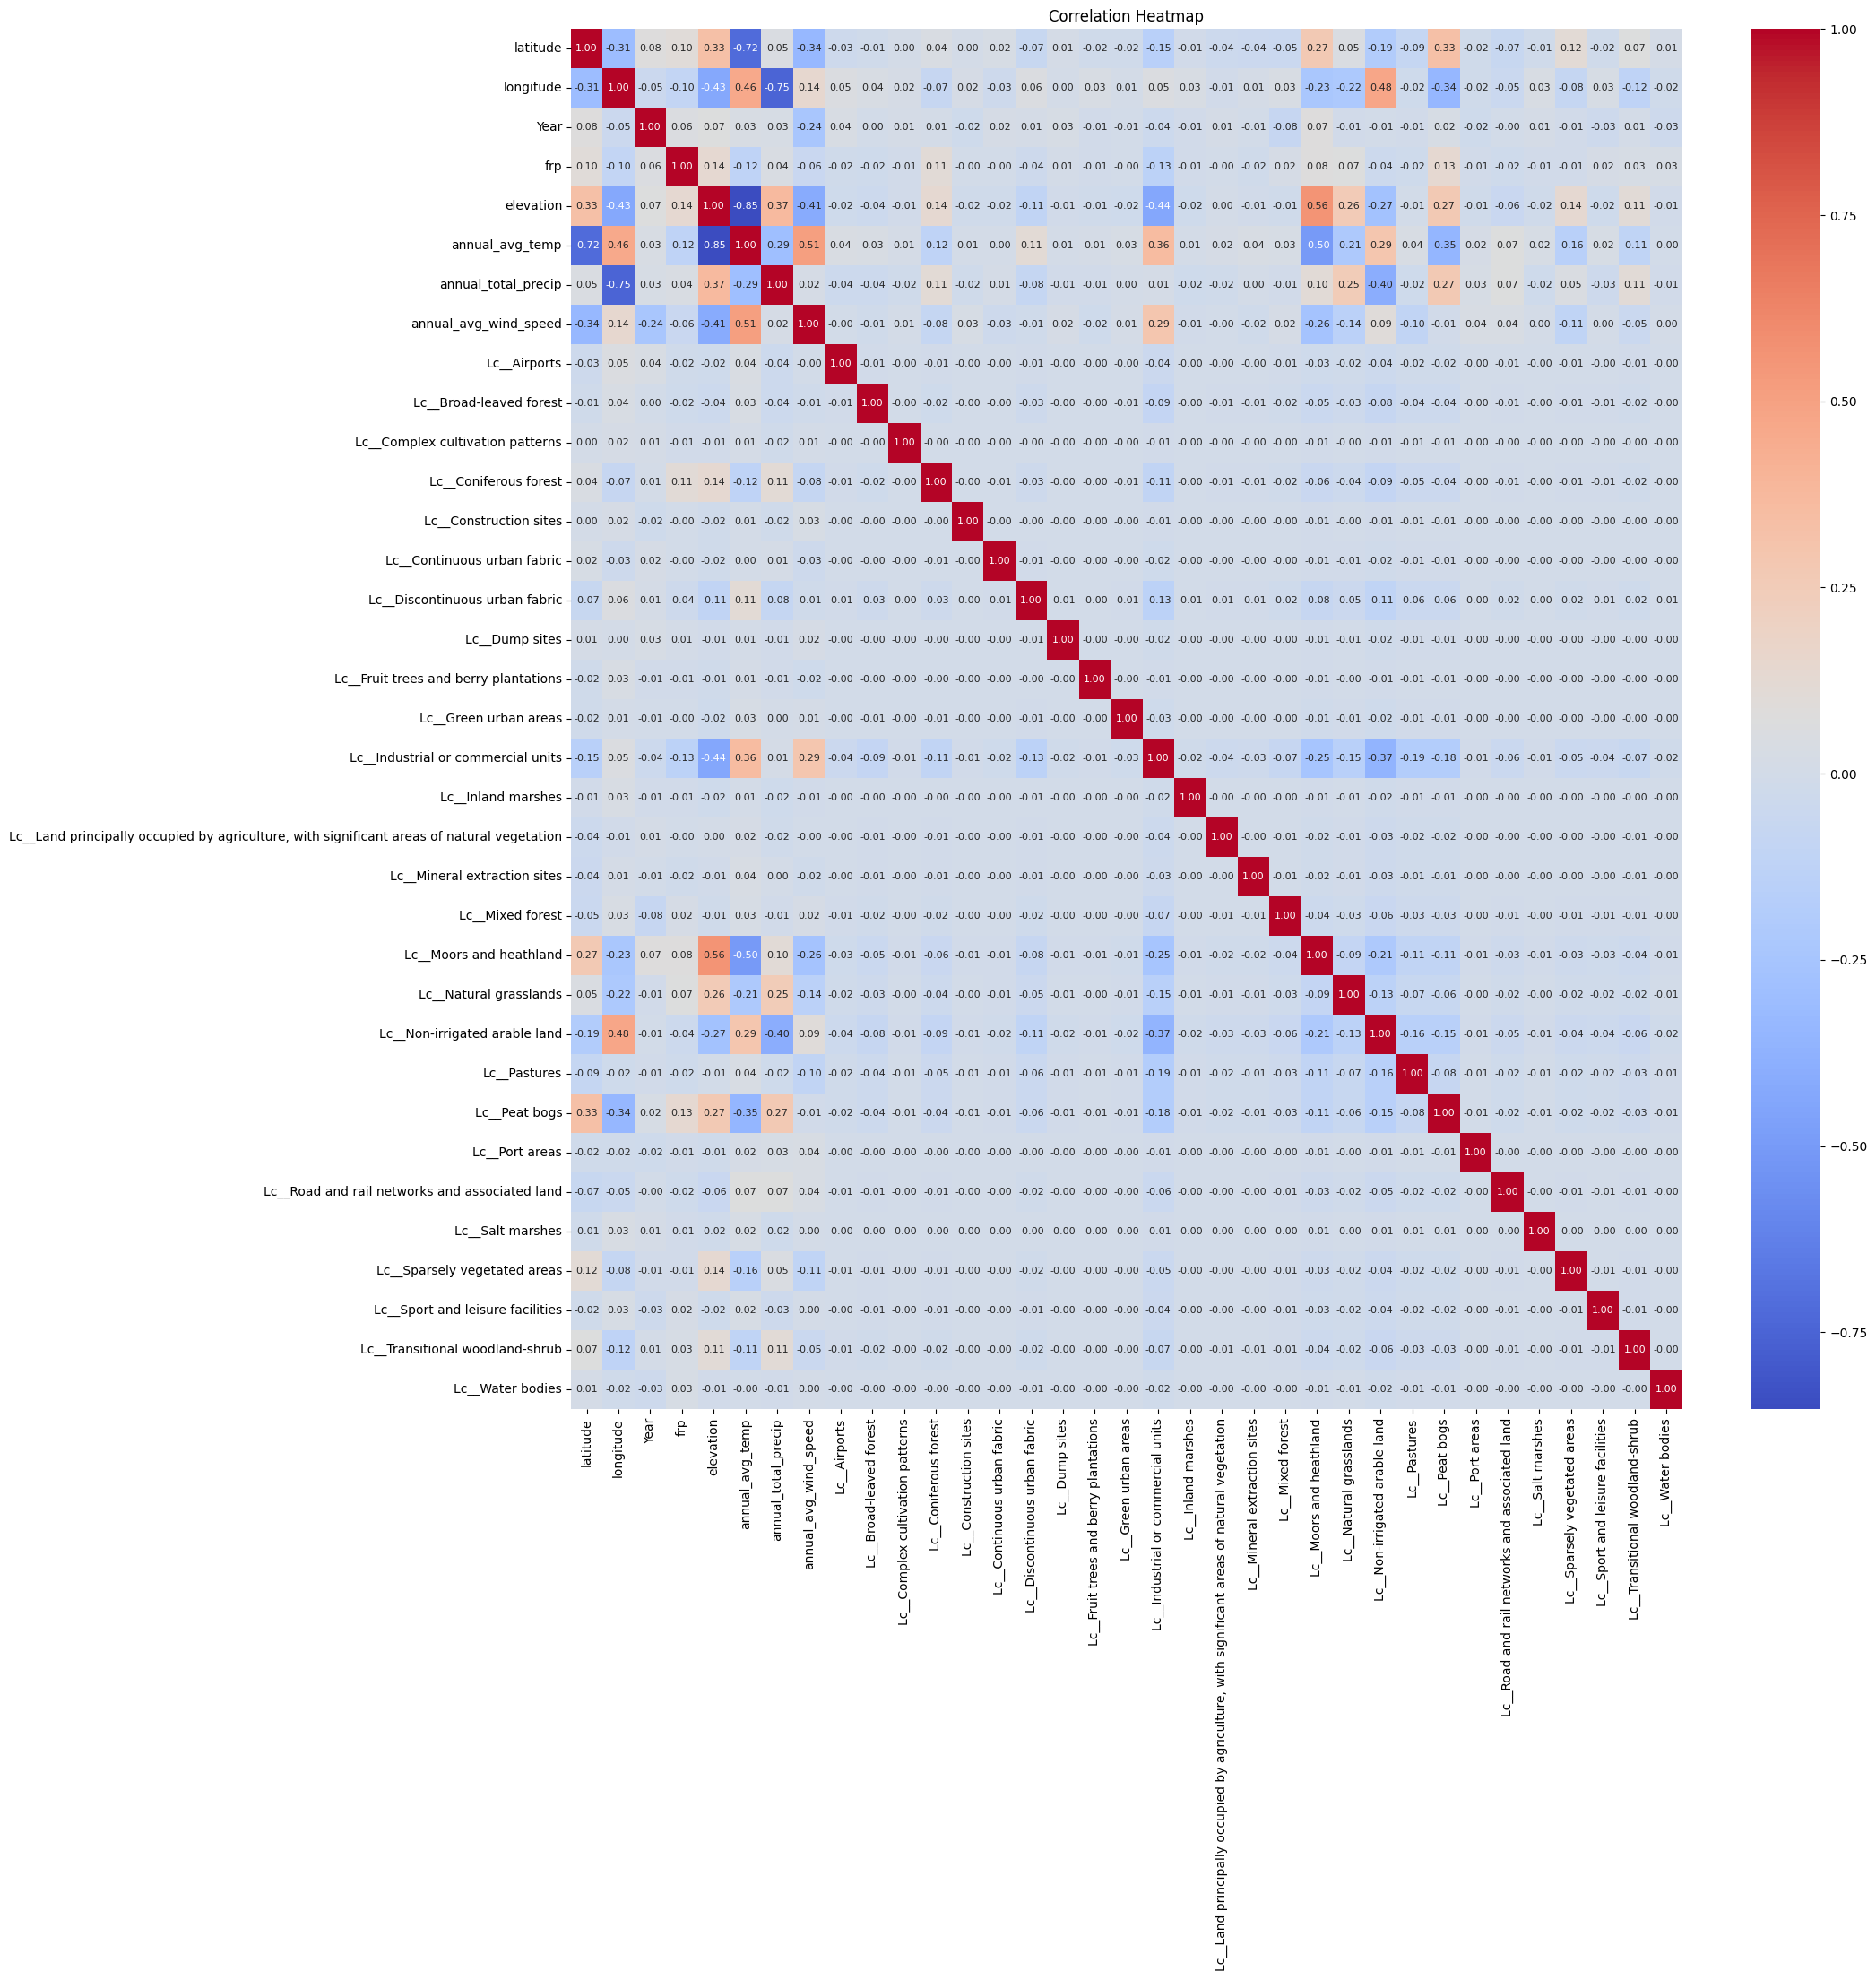

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(20, 20))
correlation_matrix = df_sub2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

None of the correlations are above 0.9 or below -0.9, thus we consider there are no multicollinearities in the data.

Next, we create a **linear regression** to look at the relationship between fire intensity (FRP) and the other variables.

We fit the OLS model.

In [ ]:
#Look at the major land cover for fires
df_project['Land cover'].value_counts()
#Result: Industrial or commercial units have the highest number of fires (829)
#Result: Construction sites, Port areas, Fruit trees and berry plantations,
# Salt marshes and Complex cultivation patterns have the lowest number of fires (1)

Land cover
Industrial or commercial units                                                            829
Non-irrigated arable land                                                                 648
Moors and heathland                                                                       342
Pastures                                                                                  201
Peat bogs                                                                                 197
Natural grasslands                                                                        141
Discontinuous urban fabric                                                                105
Coniferous forest                                                                          69
Broad-leaved forest                                                                        53
Mixed forest                                                                               32
Transitional woodland-shrub                                                                31
Road and rail networks and associated land                                                 19
Sparsely vegetated areas                                                                   16
Airports                                                                                   12
Sport and leisure facilities                                                               12
Land principally occupied by agriculture, with significant areas of natural vegetation      8
Mineral extraction sites                                                                    7
Green urban areas                                                                           4
Continuous urban fabric                                                                     3
Water bodies                                                                                2
Inland marshes                                                                              2
Dump sites                                                                                  2
Construction sites                                                                          1
Port areas                                                                                  1
Fruit trees and berry plantations                                                           1
Salt marshes                                                                                1
Complex cultivation patterns                                                                1
Name: count, dtype: int64

In [ ]:
#OLS Regression model
#Define independent and dependent variables
#omit Industrial or commercial units because it is the most common land cover, will be the constant
X = df_sub2[['Year',
             'elevation',
             'annual_avg_temp',
             'annual_total_precip',
             'annual_avg_wind_speed',
             'Lc__Airports',
             'Lc__Broad-leaved forest',
             'Lc__Complex cultivation patterns',
             'Lc__Coniferous forest',
             'Lc__Construction sites',
             'Lc__Continuous urban fabric',
             'Lc__Discontinuous urban fabric',
             'Lc__Dump sites',
             'Lc__Fruit trees and berry plantations',
             'Lc__Green urban areas',
             'Lc__Inland marshes',
             'Lc__Land principally occupied by agriculture, with significant areas of natural vegetation',
             'Lc__Mineral extraction sites',
             'Lc__Mixed forest',
             'Lc__Moors and heathland',
             'Lc__Natural grasslands',
             'Lc__Non-irrigated arable land',
             'Lc__Pastures', 'Lc__Peat bogs',
             'Lc__Port areas',
             'Lc__Road and rail networks and associated land',
             'Lc__Salt marshes',
             'Lc__Sparsely vegetated areas',
             'Lc__Sport and leisure facilities',
             'Lc__Transitional woodland-shrub',
             'Lc__Water bodies']]
y = df_sub2['frp']

In [ ]:
# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

In [ ]:
#Fit OLS model
ols_model = sm.OLS(y, X).fit()

#Get residuals from the fitted model
ols_residuals = ols_model.resid

In [ ]:
#OLS regression summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    frp   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     6.129
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           9.11e-24
Time:                        10:38:13   Log-Likelihood:                -13268.
No. Observations:                2740   AIC:                         2.660e+04
Df Residuals:                    2708   BIC:                         2.679e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

### **Part 5: Spatial analysis of fire intensity, using Moran's I**

We calculate Moran's I value and it's significance to check for spatial autocorrelation of fire intensity (FRP), which would indicate spatial patterns.

In [ ]:
#Create new subset for spatial analysis
#Including the fire ID and geometry columns back in
#Excluding unnecessary columns
df_sub3 = pd.concat([df_project, dummies], axis=1)
df_sub3 = df_sub3.drop(columns=['latitude', 'longitude', 'acq_date', 'Land cover', 'RGB_color'])
df_sub3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 35 columns):
 #   Column                                                                                      Non-Null Count  Dtype   
---  ------                                                                                      --------------  -----   
 0   frp                                                                                         2740 non-null   float64 
 1   geometry                                                                                    2740 non-null   geometry
 2   Year                                                                                        2740 non-null   int64   
 3   elevation                                                                                   2740 non-null   float64 
 4   annual_avg_temp                                                                             2740 non-null   float64 
 5   annual_total_precip       

We chose to use the K-nearest neighbours method as we are dealing with point data.

In [ ]:
#Calculate the square root of the number of data points to know the optimized k value
math.sqrt(len(df_sub3))

52.3450093132096

In [ ]:
#Rounding it down to the nearest integer, to get k, the number of neighbors
#Calculate K-nearest neighbours weights
w_k = weights.KNN.from_dataframe(df_sub3, ids = 'ID', k = 52)

In [ ]:
#Calculate Moran's I value
mi = esda.Moran(df_sub3['frp'], w_k)
#print the I value to 3 decimal places
print(round(mi.I, 3))

0.095


In [ ]:
#print the p value to know significance
print(mi.p_sim)

0.001


Moran's I is 0.095 and is statistically significant at the 0.01 level, suggesting the presence of a slight positive spatial autocorrelation. Thus, the analysis can be furthered with a Geographically Weighted Regression.


(<Figure size 700x700 with 1 Axes>,
 <Axes: title={'center': 'Moran Scatterplot (0.09)'}, xlabel='Attribute', ylabel='Spatial Lag'>)

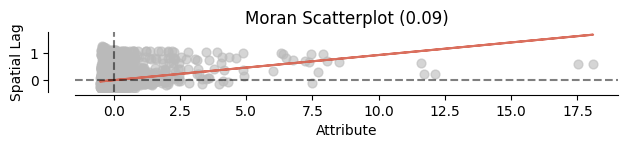

In [ ]:
#Create Moran's I scatterplot, to spot outliers
moran_scatterplot(mi)

In [ ]:
#Calculate LISA clusters
lisa = esda.Moran_Local(df_sub3['frp'], w_k)

In [ ]:
def Figure7():
  lisa_cluster(lisa, df_sub3)

### **Part 6: Geographically Weighted Regression of fires**

In [ ]:
df_sub4 = df_sub3.copy() #Create new dataset for GWR
df_sub4['geometry'] = df_sub4.geometry.centroid #calculate the centroid
df_sub4['x'] = df_sub4.geometry.x #extract x
df_sub4['y'] = df_sub4.geometry.y #extract y

In [ ]:
#Define independent variables
#omit Lc_Industrial or commercial units to use it as reference category as it is the most common land cover
X = df_sub4[['Year',
             'elevation',
             'annual_avg_temp',
             'annual_total_precip',
             'annual_avg_wind_speed',
             'Lc__Airports',
             'Lc__Broad-leaved forest',
             'Lc__Complex cultivation patterns',
             'Lc__Coniferous forest',
             'Lc__Construction sites',
             'Lc__Continuous urban fabric',
             'Lc__Discontinuous urban fabric',
             'Lc__Dump sites',
             'Lc__Fruit trees and berry plantations',
             'Lc__Green urban areas',
             'Lc__Inland marshes',
             'Lc__Land principally occupied by agriculture, with significant areas of natural vegetation',
             'Lc__Mineral extraction sites',
             'Lc__Mixed forest',
             'Lc__Moors and heathland',
             'Lc__Natural grasslands',
             'Lc__Non-irrigated arable land',
             'Lc__Pastures', 'Lc__Peat bogs',
             'Lc__Port areas',
             'Lc__Road and rail networks and associated land',
             'Lc__Salt marshes',
             'Lc__Sparsely vegetated areas',
             'Lc__Sport and leisure facilities',
             'Lc__Transitional woodland-shrub',
             'Lc__Water bodies']]

#Define dependent variable
Y = df_sub4['frp']

In [ ]:
#Create a list of coordinates (g_coords)
g_coords = list(zip(df_sub4.x, df_sub4.y))

#Convert X to numpy array
g_X = np.asarray(X)

#Convert Y to numpy array (reshaped as column vector)
g_y = np.asarray(Y).reshape((-1, 1))

In [ ]:
#The code to search for the optimized bandwidth indicates a 'Matrix is singular' error
#gwr_selector = Sel_BW(g_coords, g_y, g_X, fixed=True, spherical=True)
#bw = gwr_selector.search()

#Thus the ideal bandwdith was manually searched for
#2740, the total number of data points was the optimized number for bw


#Create the GWR model with bandwidth
gwr = GWR(g_coords, g_y, g_X, bw=2740)

#Fit the model
gwr_results = gwr.fit()

#View the results
print(gwr_results.summary())

Model type                                                         Gaussian
Number of observations:                                                2740
Number of covariates:                                                    32

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                        2578029.496
Log-likelihood:                                                  -13268.039
AIC:                                                              26600.077
AICc:                                                             26602.907
BIC:                                                            2556593.744
R2:                                                                   0.066
Adj. R2:                                                              0.055

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

Extract the relationships' coefficients to map them.

In [ ]:
#Extract local regression coefficients for Year (X1) and add it to dataset
df_sub4['GWR_coef_Year'] = gwr_results.params[:,1]
#Extract local regression coefficients for elevation (X4) and add it to dataset
df_sub4['GWR_coef_precip'] = gwr_results.params[:,4]
#Extract local regression coefficients for annual average temperature (X3) and add it to dataset
df_sub4['GWR_coef_Temperature'] = gwr_results.params[:,3]
#Extract local regression coefficients for annual average wind speed (X5) and add it to dataset
df_sub4['GWR_coef_Wind'] = gwr_results.params[:,5]



#Extract local regression coefficients for Lc_Industrial or commercial units (X0) and add it to dataset
df_sub4['X0_coef'] = gwr_results.params[:,0]
#Extract local regression coefficients for Lc__Coniferous forest (X9) and add it to dataset
df_sub4['X9_coef'] = gwr_results.params[:,9]
#Extract local regression coefficients for Lc__Mixed forest (X19) and add it to dataset
df_sub4['X19_coef'] = gwr_results.params[:,19]
#Extract local regression coefficients for Lc__Moors and heathland (X20) and add it to dataset
df_sub4['X20_coef'] = gwr_results.params[:,20]
#Extract local regression coefficients for Lc__Natural grasslands (X21) and add it to dataset
df_sub4['X21_coef'] = gwr_results.params[:,21]
#Extract local regression coefficients for Lc__Transitional woodland-shrub (X30) and add it to dataset
df_sub4['X30_coef'] = gwr_results.params[:,30]

#Check
df_sub4.head()

frp                       geometry  Year  elevation  annual_avg_temp  \
0   8.2  POINT (277299.377 187981.302)  2020       10.0        11.477495   
1  18.9  POINT (276913.248 188068.568)  2020       10.0        11.451496   
2  12.5  POINT (493023.329 408324.445)  2020       21.0        10.508996   
3   8.1  POINT (493242.799 408618.126)  2020       21.0        10.502496   
4  12.9  POINT (277649.726 186125.724)  2020        7.0        11.483994   

   annual_total_precip  annual_avg_wind_speed  ID  Lc__Airports  \
0            1973.1001              27.148827   0             0   
1            1973.1001              27.148827   1             0   
2             721.8000              24.879877   2             0   
3             721.8000              24.879877   3             0   
4            1973.1001              27.148827   4             0   

   Lc__Broad-leaved forest  ...  GWR_coef_Year  GWR_coef_precip  \
0                        0  ...       0.353689        -0.004690   
1                        0  ...       0.353573        -0.004689   
2                        0  ...       0.482129        -0.004553   
3                        0  ...       0.482414        -0.004552   
4                        0  ...       0.353958        -0.004695   

   GWR_coef_Temperature  GWR_coef_Wind     X0_coef    X9_coef   X19_coef  \
0              3.319371      -0.134190 -730.559959  27.513635  12.793843   
1              3.317205      -0.133716 -730.314820  27.504172  12.797355   
2              3.918552      -0.259818 -993.750212  29.118233   9.875634   
3              3.918907      -0.260002 -994.326164  29.118293   9.870256   
4              3.325548      -0.135925 -731.124709  27.548428  12.788810   

    X20_coef   X21_coef   X30_coef  
0  19.183434  22.807267  15.947224  
1  19.179160  22.804199  15.943554  
2  18.290140  21.379899  16.633363  
3  18.285882  21.375196  16.633743  
4  19.203187  22.824364  15.961210  

[5 rows x 47 columns]

Map out the different distributions of the relationship coefficients between FRP and the explanatory variables.

Map for Year variable.

In [ ]:
def Figure8():
  #Create plot for Year coefficient
  fig, ax = plt.subplots(1)
  df_sub4.plot(ax = ax, column = 'GWR_coef_Year', cmap = 'coolwarm',legend = True)
  plt.title('Local Coefficients for Year')
  ax.set_axis_off()
  plt.show()

Maps of the meteorological variables.

In [ ]:
def Figure9():
  #Create plots of coefficients of meteorological variables
  #Create a 1x3 grid of subplots (1 rows, 3 columns)
  fig, axs = plt.subplots(1, 3, figsize=(15, 6))

  #Create list of the coefficients column and titles for the 3 plots
  coeff_columns = ['GWR_coef_precip', 'GWR_coef_Temperature', 'GWR_coef_Wind',]

  titles = [
    'A) Local Coefficients \n of Total Annual Precipitation',
    'B) Local Coefficients \n of Annual Average Temperature',
    'C) Local Coefficients \n of Annual Average Wind Speed']

  #Loop through each subplot and plot map
  for i, (col, title) in enumerate(zip(coeff_columns, titles)):

      #Acess specific axis for each plot
      ax = axs[i]

      #Create plot on the specific axis
      df_sub4.plot(ax=ax, column=col, cmap='coolwarm', legend=True)
      ax.set_title(title, fontsize=12)
      ax.set_axis_off()

      #Adjust legend size to prevent it from overlapping
      leg = ax.get_legend()
      if leg:
          leg.set_bbox_to_anchor((1.05, 0.5))  #Move legend outside plot
          leg.set_fontsize(8)

  #Adjust layout to prevent overlap of subplots and titles
  plt.subplots_adjust(hspace=0.4, wspace=0.4)

  #Show all 3 plots in a single figure
  plt.show()

Maps of the land cover variables.

In [ ]:
def Figure10():
  # Create a 2x3 grid of subplots (2 rows, 3 columns)
  fig, axs = plt.subplots(2, 3, figsize=(15, 18))

  #Create list of the coefficients column and titles for the 6 plots
  coeff_columns = ['X0_coef', 'X9_coef', 'X19_coef',
                 'X20_coef', 'X21_coef', 'X30_coef']
  titles = [
    'A) Local Coefficients \n Industrial or commercial units',
    'B) Local Coefficients \n Coniferous forest',
    'C) Local Coefficients \n Mixed forest',
    'D) Local Coefficients \n Moors and heathland',
    'E) Local Coefficients \n Natural grasslands',
    'F) Local Coefficients \n Transitional woodland-shrub'
  ]

  #Loop through each subplot and plot map
  for i, (col, title) in enumerate(zip(coeff_columns, titles)):
      #Get row and column index for the current subplot
      row, col_idx = divmod(i, 3)

      ax = axs[row, col_idx]  #Access specific axis from the grid

      #Create plot on the specific axis
      df_sub4.plot(ax=ax, column=col, cmap='coolwarm', legend=True)
      ax.set_title(title, fontsize=10)
      ax.set_axis_off()

      #Adjust legend size to prevent it from overlapping
      leg = ax.get_legend()
      if leg:
          leg.set_bbox_to_anchor((1.05, 0.5))  #Move legend outside plot
          leg.set_fontsize(8)

  #Adjust layout to prevent overlap of subplots and titles
  plt.subplots_adjust(hspace=0.4, wspace=0.4)

  #Show all 6 plots in a single figure
  plt.show()

## **Part 7: Checking OLS assumptions and Trying data transformations.**

For the purpose of this project, an OLS model was used for analysis of the data, to demonstrate use of taught statistical techniques on the course. However, when checking the assumptions of the model, it appears the data violates the assumptions.


The ordinary least squares (OLS) regression has the following assumptions:
* Linearity
* Homoscedasticity
* Normality of residuals
* No multicollinearity (this was checked earlier)
* No autocorrelation

1) Check **linearity**, using total annual precipitation as an example environmental variable.

In [ ]:
#Add constant (constant) to the feature matrix
X_with_intercept = sm.add_constant(X)

#Predicted values from the OLS model using the updated X
y_pred_ols = ols_model.predict(X_with_intercept)

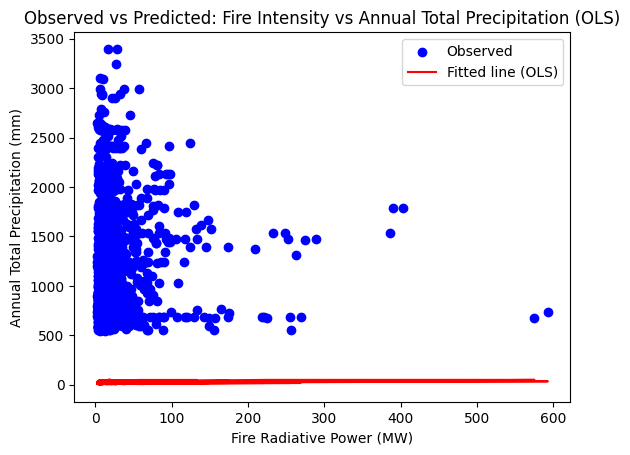

In [ ]:
#Check Linearity

# Scatter plot of observed vs predicted values
plt.scatter(df_sub2['frp'], df_sub2['annual_total_precip'], label='Observed', color='blue')
plt.plot(df_sub2['frp'], y_pred_ols, label='Fitted line (OLS)', color='red')
plt.xlabel("Fire Radiative Power (MW)")
plt.ylabel("Annual Total Precipitation (mm)")
plt.title("Observed vs Predicted: Fire Intensity vs Annual Total Precipitation (OLS)")
plt.legend()
plt.show()

Result: The linearity assumption is violated.

2) Check **homoscedasticity** with a Residuals vs Fitted values plot.

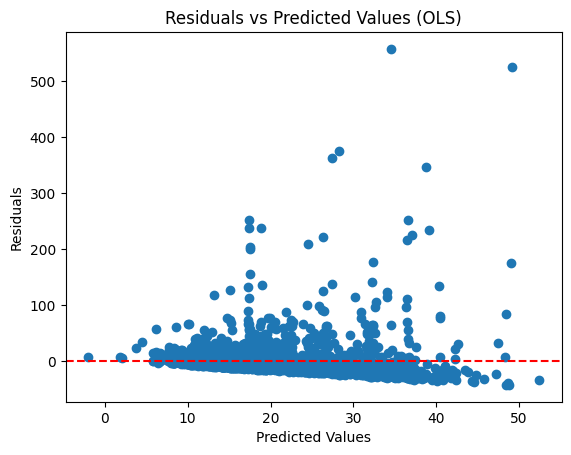

In [ ]:
#Plot residuals vs fitted value

# Residuals vs predicted values
plt.scatter(y_pred_ols, ols_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (OLS)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Result: The Residuals VS Fitted values plot does not show random scatter, thus homoscedasticity seems to be violated.

3) We check the **normality** assumption with a Q-Q plot and a Shapiro test.

<Figure size 800x600 with 0 Axes>

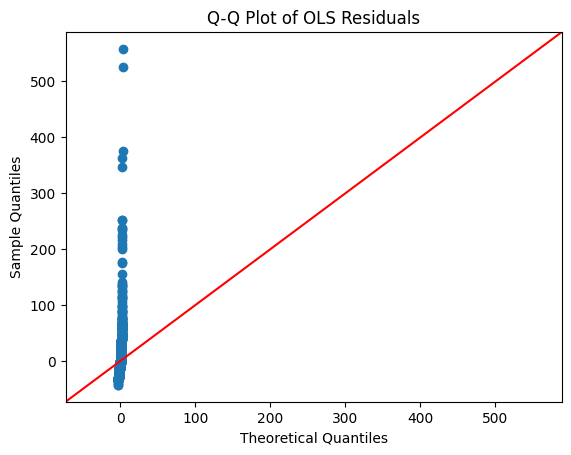

In [ ]:
#Q-Q Plot
plt.figure(figsize=(8, 6))
sm.qqplot(ols_residuals, line ='45')
plt.title("Q-Q Plot of OLS Residuals")
plt.show()

In [ ]:
#Shapiro Test
stat, p_value = stats.shapiro(ols_residuals)

print(f"Shapiro-Wilk Test: stat={stat}, p-value={p_value}")

Shapiro-Wilk Test: stat=0.4489136900482924, p-value=3.4026538593087364e-68


Result: The FRP data is not normally distributed, thus we try transforming the data with :
* log transformation
* square-root transformation
* Box-Cox transformation

**Log Transformation:**

In [ ]:
#Create new column with log transformation of frp
df_sub2['log_transformed_frp'] = np.log(df_sub2['frp'] + 1)  #Add +1 to avoid log(0) issues

In [ ]:
#OLS Regression model
#Define independent and dependent variables
#omit Industrial or commercial units because it is the most common land cover
X = df_sub2[['Year',
             'elevation',
             'annual_avg_temp',
             'annual_total_precip',
             'annual_avg_wind_speed',
             'Lc__Airports',
             'Lc__Broad-leaved forest',
             'Lc__Complex cultivation patterns',
             'Lc__Coniferous forest',
             'Lc__Construction sites',
             'Lc__Continuous urban fabric',
             'Lc__Discontinuous urban fabric',
             'Lc__Dump sites',
             'Lc__Fruit trees and berry plantations',
             'Lc__Green urban areas',
             'Lc__Inland marshes',
             'Lc__Land principally occupied by agriculture, with significant areas of natural vegetation',
             'Lc__Mineral extraction sites',
             'Lc__Mixed forest',
             'Lc__Moors and heathland',
             'Lc__Natural grasslands',
             'Lc__Non-irrigated arable land',
             'Lc__Pastures', 'Lc__Peat bogs',
             'Lc__Port areas',
             'Lc__Road and rail networks and associated land',
             'Lc__Salt marshes',
             'Lc__Sparsely vegetated areas',
             'Lc__Sport and leisure facilities',
             'Lc__Transitional woodland-shrub',
             'Lc__Water bodies']]
y = df_sub2['log_transformed_frp']

In [ ]:
# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

In [ ]:
#Fit OLS model
log_ols_model = sm.OLS(y, X).fit()

#Get residuals from the fitted model
log_residuals = log_ols_model.resid

<Figure size 800x600 with 0 Axes>

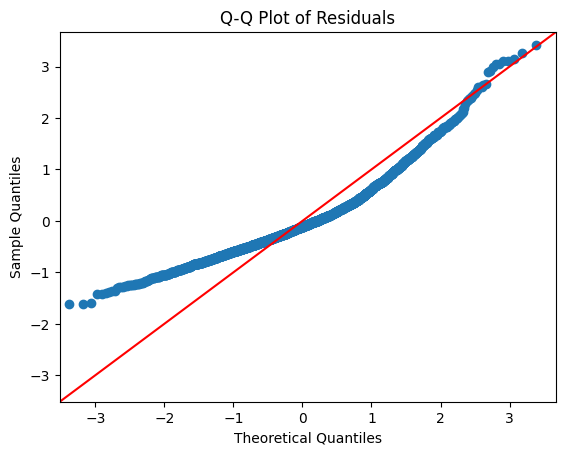

In [ ]:
#Q-Q Plot
plt.figure(figsize=(8, 6))
sm.qqplot(log_residuals, line ='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
#Shapiro Test
stat, p_value = stats.shapiro(log_residuals)

print(f"Shapiro-Wilk Test: stat={stat}, p-value={p_value}")

Shapiro-Wilk Test: stat=0.935791632713207, p-value=7.44586245251548e-33


Result: The log trasnformation did not normalise the data.

**Square-root Transformation:**

In [ ]:
#Create new column with sqrt transfromation of frp
df_sub2['sqrt_transformed_frp'] = np.sqrt(df_sub2['frp'])

In [ ]:
#OSL Regression model
#Define independent and dependent variables
#omit Industrial or commercial units because it is the most common land cover
X = df_sub2[['Year',
             'elevation',
             'annual_avg_temp',
             'annual_total_precip',
             'annual_avg_wind_speed',
             'Lc__Airports',
             'Lc__Broad-leaved forest',
             'Lc__Complex cultivation patterns',
             'Lc__Coniferous forest',
             'Lc__Construction sites',
             'Lc__Continuous urban fabric',
             'Lc__Discontinuous urban fabric',
             'Lc__Dump sites',
             'Lc__Fruit trees and berry plantations',
             'Lc__Green urban areas',
             'Lc__Inland marshes',
             'Lc__Land principally occupied by agriculture, with significant areas of natural vegetation',
             'Lc__Mineral extraction sites',
             'Lc__Mixed forest',
             'Lc__Moors and heathland',
             'Lc__Natural grasslands',
             'Lc__Non-irrigated arable land',
             'Lc__Pastures', 'Lc__Peat bogs',
             'Lc__Port areas',
             'Lc__Road and rail networks and associated land',
             'Lc__Salt marshes',
             'Lc__Sparsely vegetated areas',
             'Lc__Sport and leisure facilities',
             'Lc__Transitional woodland-shrub',
             'Lc__Water bodies']]
y = df_sub2['sqrt_transformed_frp']

In [ ]:
# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

In [ ]:
#Fit OLS model
sqrt_ols_model = sm.OLS(y, X).fit()

#Get residuals from the fitted model
sqrt_residuals = sqrt_ols_model.resid

<Figure size 800x600 with 0 Axes>

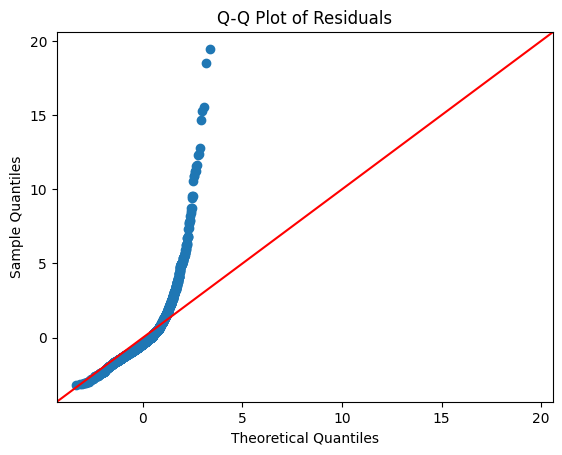

In [ ]:
#Q-Q Plot
plt.figure(figsize=(8, 6))
sm.qqplot(sqrt_residuals, line ='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
#Shapiro Test
stat, p_value = stats.shapiro(sqrt_residuals)

print(f"Shapiro-Wilk Test: stat={stat}, p-value={p_value}")

Shapiro-Wilk Test: stat=0.746591483259837, p-value=6.745229658444751e-54


Result: Transforming the data with a square-root transformation does not help normalise the data.

**Box-Cox Transformation**

The Box-Cox method allows to convert non-normal data into normal data. It helps to find the best power, lambda (λ),to transform the data to a normal distribution.

In [ ]:
#Apply Box-Cox transformation to the 'frp' column
transformed_data, lambda_ = stats.boxcox(df_sub2['frp'])

#Create new column with Box-Cox transformation of frp
df_sub2['box_cox_frp'] = transformed_data

In [ ]:
#Show lambda value
print(f"Optimal Box-Cox Lambda: {lambda_}")

Optimal Box-Cox Lambda: -0.4700622577858229


The lambda value is negative which indicates a negative power transformation. The dependent variable (FRP) should be transformed as y**(−0.47).



In [ ]:
#Define independent and dependent variables
#omit Industrial or commercial units because it is the most common land cover
X = df_sub2[['Year',
             'elevation',
             'annual_avg_temp',
             'annual_total_precip',
             'annual_avg_wind_speed',
             'Lc__Airports',
             'Lc__Broad-leaved forest',
             'Lc__Complex cultivation patterns',
             'Lc__Coniferous forest',
             'Lc__Construction sites',
             'Lc__Continuous urban fabric',
             'Lc__Discontinuous urban fabric',
             'Lc__Dump sites',
             'Lc__Fruit trees and berry plantations',
             'Lc__Green urban areas',
             'Lc__Inland marshes',
             'Lc__Land principally occupied by agriculture, with significant areas of natural vegetation',
             'Lc__Mineral extraction sites',
             'Lc__Mixed forest',
             'Lc__Moors and heathland',
             'Lc__Natural grasslands',
             'Lc__Non-irrigated arable land',
             'Lc__Pastures', 'Lc__Peat bogs',
             'Lc__Port areas',
             'Lc__Road and rail networks and associated land',
             'Lc__Salt marshes',
             'Lc__Sparsely vegetated areas',
             'Lc__Sport and leisure facilities',
             'Lc__Transitional woodland-shrub',
             'Lc__Water bodies']]
y = df_sub2['box_cox_frp']

In [ ]:
# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

In [ ]:
#Fit OLS model
box_cox_model = sm.OLS(y, X).fit()

#Get residuals from the fitted model
box_cox_residuals = box_cox_model.resid

<Figure size 800x600 with 0 Axes>

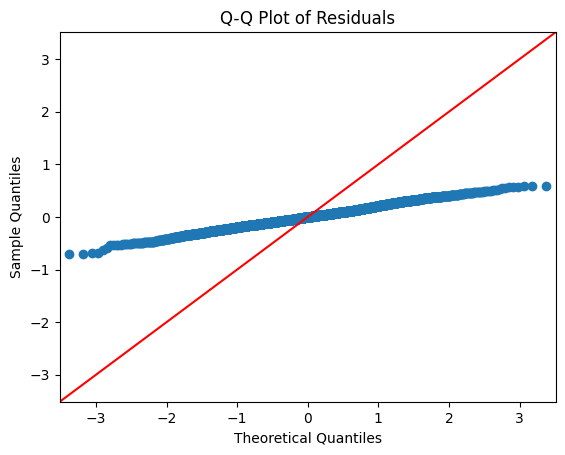

In [ ]:
#Q-Q Plot
plt.figure(figsize=(8, 6))
sm.qqplot(box_cox_residuals, line ='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
#Add constant (constant) to the feature matrix
X_with_intercept = sm.add_constant(X)

#Predicted values from the OLS model using the updated X
y_pred_box_cox = box_cox_model.predict(X_with_intercept)

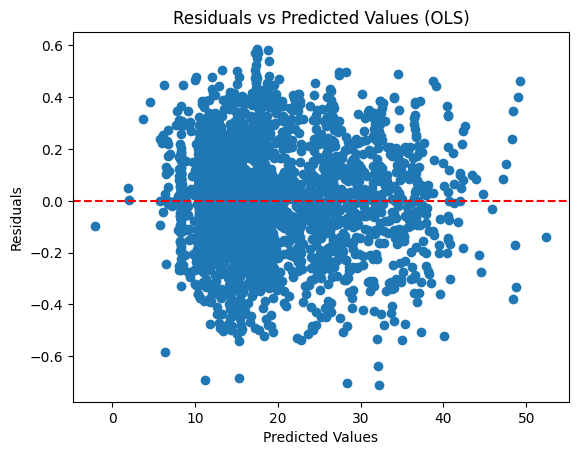

In [ ]:
#Plot residuals vs fitted value

# Residuals vs predicted values
plt.scatter(y_pred_ols, box_cox_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (OLS)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
#Shapiro Test
stat, p_value = stats.shapiro(box_cox_residuals)

print(f"Shapiro-Wilk Test: stat={stat}, p-value={p_value}")

Shapiro-Wilk Test: stat=0.9981050558031489, p-value=0.002415473590473503


The Box-Cox transformation helped bring the data closer to a normal distribution and addressed the issue of homoscedasticity. However, the data still does not follow a normal distribution.

In [ ]:
#Checking for over dispersion
#Calculate variance and mean of FRP
var_frp = df_project['frp'].var()
mean_frp = df_project['frp'].mean()
print(var_frp)
print(mean_frp)

1007.2639723272689
18.635328467153286


**Conclusion:**
* all three asumption (linearity, homoscedasticty and normality) are violated
* there is no high multicollinearity (seen in heatmap)
* the data seems right skewed (seen in FRP histogram)
* the data is overdispersed as the variance (1007.3) is much higher than the mean (18.6)

Therefore, an OLS regression model is not appropriate to analyse the data.

Other statistical tests should be used to test the relationship between fire intensity (FRP) and environmental variables.

## **Part 8: Extra Analysis Attempt**

In this part of the analysis, we attempt to fit a Gamma Regression Model, as an OLS regression was shown not to be appropriate.

In [ ]:
#Gamma Regression model
#Define independent and dependent variables
#omit Industrial or commercial units because it is the most common land cover, will be the constant
X = df_sub2[['Year',
             'elevation',
             'annual_avg_temp',
             'annual_total_precip',
             'annual_avg_wind_speed',
             'Lc__Airports',
             'Lc__Broad-leaved forest',
             'Lc__Complex cultivation patterns',
             'Lc__Coniferous forest',
             'Lc__Construction sites',
             'Lc__Continuous urban fabric',
             'Lc__Discontinuous urban fabric',
             'Lc__Dump sites',
             'Lc__Fruit trees and berry plantations',
             'Lc__Green urban areas',
             'Lc__Inland marshes',
             'Lc__Land principally occupied by agriculture, with significant areas of natural vegetation',
             'Lc__Mineral extraction sites',
             'Lc__Mixed forest',
             'Lc__Moors and heathland',
             'Lc__Natural grasslands',
             'Lc__Non-irrigated arable land',
             'Lc__Pastures', 'Lc__Peat bogs',
             'Lc__Port areas',
             'Lc__Road and rail networks and associated land',
             'Lc__Salt marshes',
             'Lc__Sparsely vegetated areas',
             'Lc__Sport and leisure facilities',
             'Lc__Transitional woodland-shrub',
             'Lc__Water bodies']]
y = df_sub2['frp']

In [ ]:
#Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

In [ ]:
#Fit Gamma regression model with log link
gamma_model = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log())).fit()

#Get residuals from the fitted model
gamma_residuals = gamma_model.resid_response

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [ ]:
#Gamma regression model summary
print(gamma_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    frp   No. Observations:                 2740
Model:                            GLM   Df Residuals:                     2708
Model Family:                   Gamma   Df Model:                           31
Link Function:                    log   Scale:                          1.5830
Method:                          IRLS   Log-Likelihood:                -10949.
Date:                Thu, 23 Jan 2025   Deviance:                       1844.0
Time:                        10:38:40   Pearson chi2:                 4.29e+03
No. Iterations:                    31   Pseudo R-squ. (CS):            0.09393
Covariance Type:            nonrobust                                         
                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

**Diagnostic Plots of model**

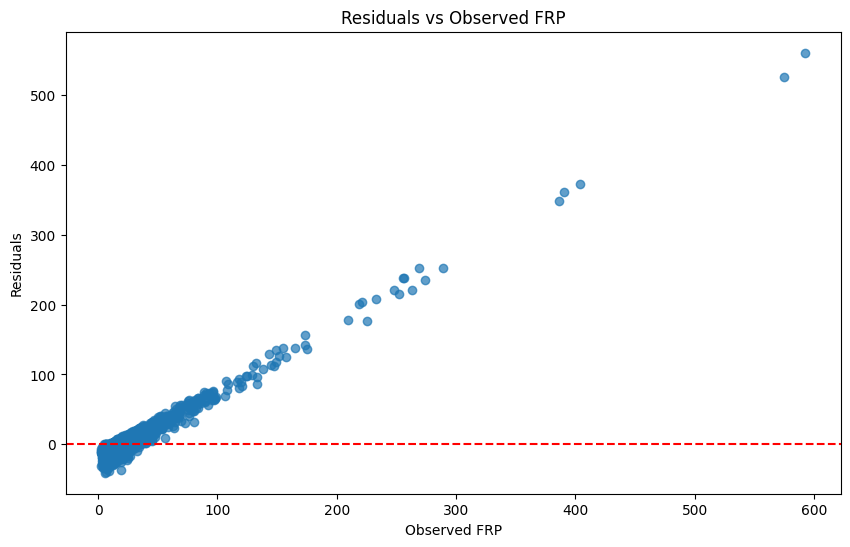

In [ ]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y, gamma_residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Observed FRP')
plt.ylabel('Residuals')
plt.title('Residuals vs Observed FRP')
plt.show()

<Figure size 800x600 with 0 Axes>

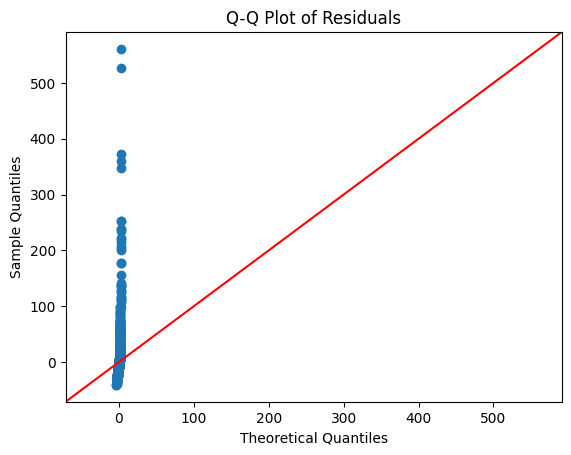

In [ ]:
#Q-Q Plot
plt.figure(figsize=(8, 6))
sm.qqplot(gamma_residuals, line ='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

The diagnostic plots show the assumptions of normality and homoscedastic are violated. Thus the gamma regression model is not appropriate for analysis either.



# **Results**

## **Kernel Density Estimation Analyses**

The Kernel Density Estimation (KDE) of fire counts showed densities are very low, indicating there were few fire events in the UK between 2020 and 2023 and that these were geographically dispersed. However, two regions can be identified as higher fire occurence density clusters: the Bannau Brycheiniog National Park near Cardiff and the Lincolnshire region (Figure 5).

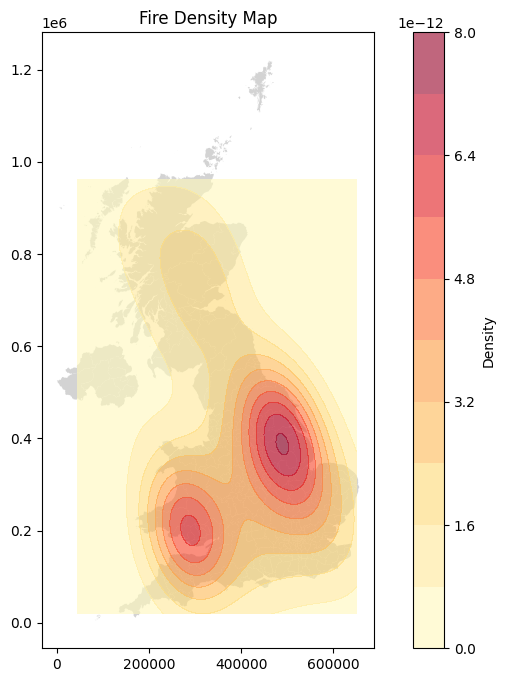

In [ ]:
Figure5()

**Figure 5.** Kernel density map of fire counts in the UK between 2020 and 2023.

Similarly, fire intensity densities were also low, indicating that concentrated areas of high fire intensity are rare and that the distribution of fire intensity is spread out. Two regions can be identified as fire intensity clusters on the KDE map: the Bannau Brycheiniog National Park near Cardiff and the Lincolnshire region (Figure 6).

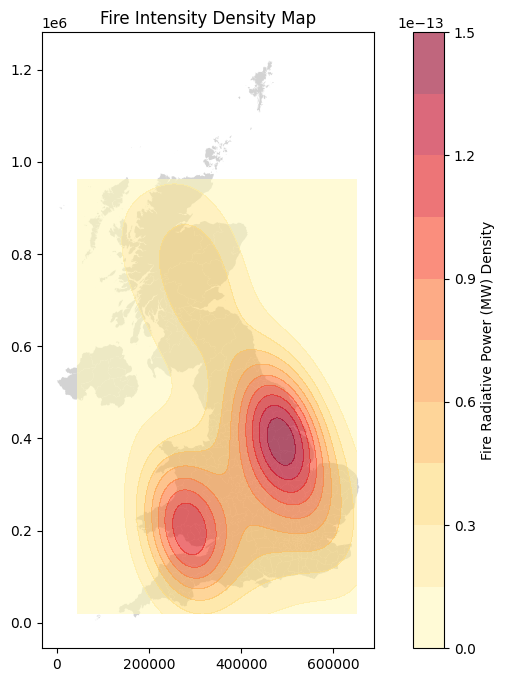

In [ ]:
Figure6()

**Figure 6.** Kernel density map of Fire Radiative Power (MW) of fires occuring in the UK between 2020 and 2023.

## **OLS Analysis**

To examine the global relationships between fire intensity (FRP) and environmental variables, an OLS regression was first performed. The model only explained 5.5% of the variation in FRP, suggesting the chosen explanatory variables do not sufficiently account for variation in FRP.

The year of occurrence was significantly positively associated with FRP (OLS, coef= 1.3093, t= 2.237, p= 0.025), indicating that fire intensity increased over time. Elevation had no significant effect on fire intensity (OLS, coef= -0.0015, t= -0.170, p= 0.865).

The total annual precipitation in the year of the fire showed a significant negative relationship with FRP (OLS, coef= -0.0042, t= -3.018, p= 0.003), implying that lower rainfall is linked to higher fire intensity. The two other meteorological variables, annual average temperature (OLS, coef= 1.6955, t= 1.757, p= 0.079) and annual average wind speed (OLS, coef= 0.0401, t= 0.114, p= 0.909), had no significant effect on fire intensity.

Seven land cover types were significantly related to FRP at the 0.05 level. The land cover type ‘Industrial or commercial units’ had a strong negative relationship with FRP (OLS, coef= -2648.6225, t= -2.239, p= 0.025), suggesting fires occurring in this land cover tend to have lower intensity. On the other hand, ‘Coniferous forest’ (OLS, coef= 32.8222, t= 7.833, p< 0.01), ‘Mixed forest’ (OLS, coef= 12.4741, t= 2.223, p= 0.026), ‘Moors and heathland’ (OLS, coef= 18.1766, t= 6.068, p<0.01), ‘Natural grassland’ (OLS, coef= 22.5498, t= 6.610, p<0.01), ‘Peat bogs’ (OLS, coef= 28.2036, t= 8.891, p<0.01), and ‘Transitional woodland-shrub’ (OLS, coef= 20.7834, t= 3.493, p<0.01), were all land cover types positively associated with FRP. This indicates that fires occurring in these land types have a higher FRP.


## **Moran's I Analysis**

The Moran's I value was 0.095 and was statistically significant (p<0.01), indicating a positive spatial autocorrelation of FRP. The positive Moran’s I value suggests areas with high FRP fires tended to be surrounded by areas with high FRP fires, and similarly, areas with low FRP fires tended to be surrounded by areas with low FRP fires. However, a Moran's I value of 0.095 indicated a very weak spatial clustering, as it is not close to 1.

The LISA cluster map (Figure 7) shows a weak positive spatial autocorrelation of fire intensity with a majority of clusters being non-significant. In the south of England, large areas of Low-Low clusters are observed, i.e. fires with low FRP are surrounded by low FRP fires. In contrast, Northern Ireland and Northern Scotland mainly show High-High clusters, i.e. areas with high FRP fires are in proximity of high FRP fires.

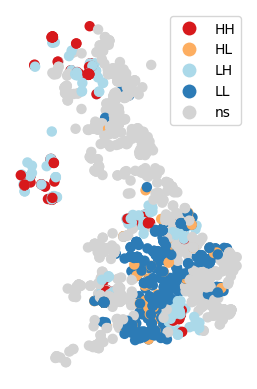

In [ ]:
Figure7()

**Figure 7.** Lisa cluster map of the FRP of fires.
The different cluster types are as follows:
*	HH : High-high (red): high values surrounded by high values
*	HL : High-low (orange): high values surrounded by low values
*	LH : Low-high (light blue): low values surrounded by high values
*	LL : Low-low (dark blue): low values surrounded by low values
*	ns : non-significant (grey) spatial autocorrelation



## **Geographical Weighted Regression (GWR) Analysis**

As Moran’s I analysis suggested a slight spatial autocorrelation in fire radiative power (FRP), a Geographic Weighted Regression was conducted. Unlike the global regression model, which assumes uniform relationships between independent and explanatory variables across the entire study area, the GWR model allows the relationship coefficients to vary spatially, allowing to detect local trends.

The GWR model had a higher adjusted R-squared (0.067) compared to the global regression model (0.055), and a lower residual sum of squares, indicating it was better at explaining variation in FRP and provided a more appropriate fit by accounting for local variations in the data. However, the model still only explained 6.7% of the variation in fire intensity, suggesting again that the chosen explanatory variables may not be the most appropriate to capture variation in FRP.

The relationship between Year and FRP was slightly stronger in the North of Scotland, where FRP increased faster over time compared to other regions, but generally showed a consistent positive relationship across the UK (OLS coef= 1.309, GWR mean coef= 0.703) (Figure 8).


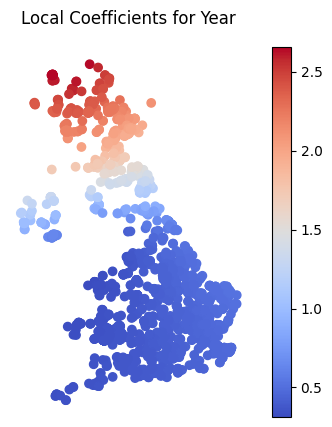

In [ ]:
Figure8()

**Figure 8.** Spatial distribution of the GWR model coefficients, presenting the relationship between Year and FRP.

## **Meteorological effects**

The effect of total annual precipitation on FRP remained consistently negative across space, as indicated by the GWR mean coefficient of -0.004, which closely matched the global coefficient. The negative relationship was very slightly more pronounced in the south of the UK (England and Wales) where lower rainfall contributed to slightly higher fire intensity than in the north (Northern Ireland and Scotland) (Figure 9).

Annual average temperature and wind speed were statistically non-significant in the OLS and showed low coefficient standard deviations in the GWR, confirming they have little to no influence on FRP, even if there seemed to be some spatial patterns (Figure 9).

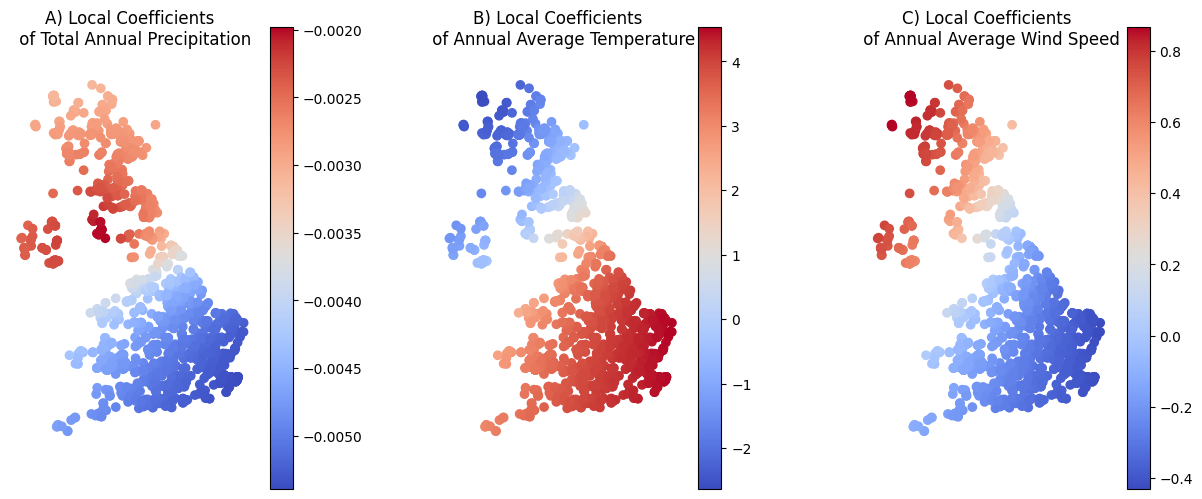

In [ ]:
Figure9()

**Figure 9.** Spatial distribution of the GWR model coefficients, presenting the relationship between meteorological variables and FRP.

## **Land cover effects**

The negative relationship between the ‘Industrial or commercial units’ and FRP was highly variable across space. The GWR analysis showed a broad range of coefficients, from -5338.731 to -644.625. The negative relationship was particularly strong in the north of Scotland, compared to the more moderate negative effects in the south of the UK (Figure 10).

For ‘Coniferous forest’ (OLS coef= 32.822, GWR mean coef= 28.278) and ‘Transitional woodland-shrub’ (OLS coef= 20.783, GWR mean coef= 16.461) land covers, the relationship with FRP was positive and consistent across the UK. However, the strength of the relationship was slightly weaker on the west coast of the UK and Northern Ireland (Figure 10).

The ‘Moors and heathland’ (OLS coef= 18.177, GWR mean coef= 17.102) and the ‘Natural grasslands’ (OLS coef= 22.550, GWR mean coef= 21.005) land covers also exhibited consistent positive relationships with FRP across the UK. FRP was slightly stronger in the south of the UK but generally remained similar across the study area (Figure 10).

On the contrary, the relationship between the ‘Mixed forest’ (OLS coef= 12.474, GWR mean coef= 17.102) land cover changed spatially, as FRP was stronger on the west coast of the UK and Northern Ireland (Figure 10).

The land covers that were statistically non-significant in the OLS displayed low coefficient standard deviations in the GWR, confirming that any potential spatial variation in their effects on FRP is minimal.



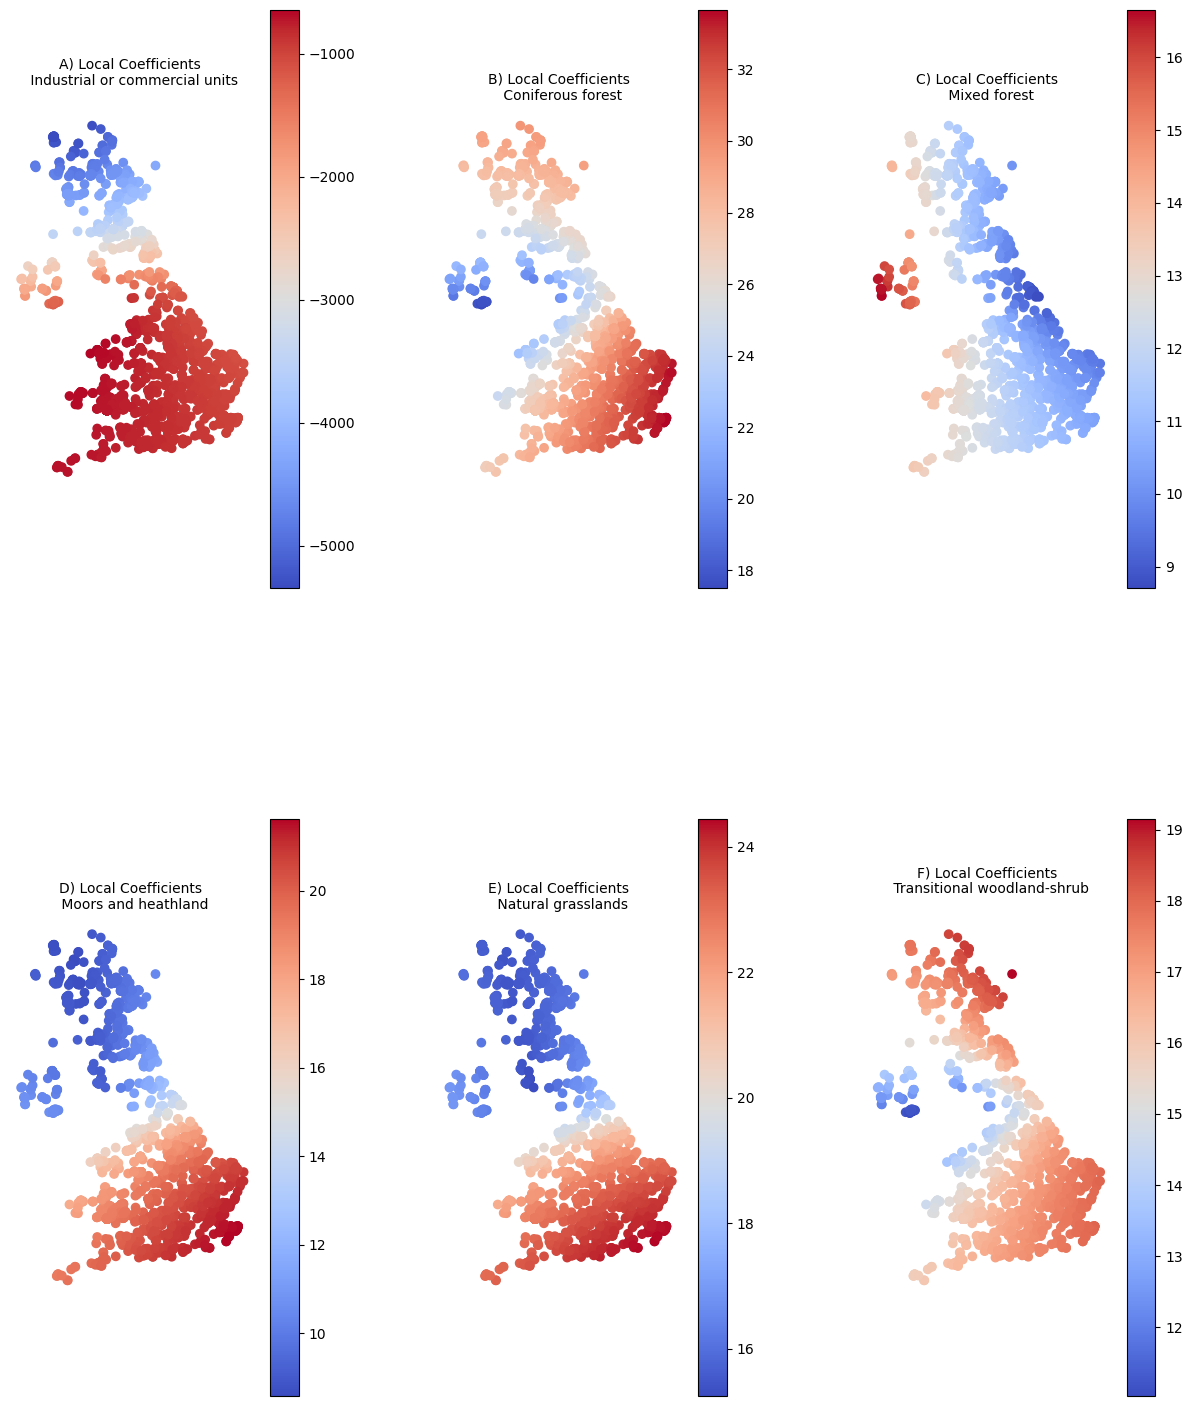

In [ ]:
Figure10()

**Figure 10.** Spatial distribution of the GWR model coefficients of the significant land covers and FRP. A) Industrial or commercial units, B) Coniferous forest, C) Mixed forest, D) Moors and heathland, E) Natural grasslands, F) Transitional woodland-shrub.

# **Discussion**

Overall, fires in the UK were generally of low intensity, with rare occurrences of high-intensity fires. This is consistent with reports indicating that 99% of fires in England are small, covering under 1 hectare and half under 5𝑚2 (Forestry Commission, 2023). The UK’s temperate climate, which is not typically associated with wildfires, may explain this trend (McMorrow 2011). Fire intensity exhibited weak positive spatial autocorrelation, indicating a largely random distribution across the UK. Low FRP fire clusters were observed in England, whereas high fire clusters were seen in Northern Ireland and northern Scotland. These patterns may reflect higher urban density and better fire management resources in England, compared to more vegetated, rural and isolated areas in the north (Pateman, 2011).

Over the four years, fire intensity increased, especially in Scotland, possibly due to the growing impact of climate change on conditions favourable to fire intensity (Arnell *et al*., 2021). However, this study could be expanded by including more years for a long-term analysis and time series evaluation. This analysis was limited to four years due to restrictions on the number of API calls within a given timeframe.

As expected, lower total annual precipitation was associated with increased fire intensity, as reduced moisture in fuels promotes higher fire intensities (Freeborn *et al*., 2016). This was particularly evident in the south of the UK. While wet years allow fuel to build up, the UK’s typically high moisture levels mean that fire intensity only rises when precipitation is low enough to dry out the fuels (McMorrow 2011). Annual average temperature and wind speed did not appear to affect fire intensity, contrary to previous studies’ findings (Ma *et al*., 2022; Liu *et al*., 2010; Perry *et al*., 2021). Elevation was also found to have no effect on fire intensity, contrary to findings by Ma *et al*. (2022) and Monjarás-Vega *et al*. (2020). This could be explained by the UK’s unique climate, causing the drivers of fire intensity to differ, or by the limited four-year dataset, which may not have captured enough variation in meteorological and topographic conditions.

Land cover types impacted fire intensity, which is consistent with previous studies (Cano-Crespo *et al*., 2022). The ‘Industrial or commercial units’ areas were associated with low-intensity fires, likely due to the limited vegetation and fuel availability of this urban land cover type. This relationship was stronger in the north than in the south of the UK.

Coniferous forest, mixed forest, moors and heathland, natural grassland, peat bogs and transitional woodland-shrub were all land covers linked to higher fire intensity. Thus, as anticipated, land covers with more vegetation tend to burn more intensely than those with less vegetation, such as urban or agricultural areas, which were not associated with fire intensity (Yang *et al*., 2023; Avila-Flores *et al*., 2010). Some slight north-south and west-east variations in the positive relationships between these six land covers and fire intensity were observed. These could be due to climatic gradients or regional differences in firefighting management (Moreira *et al*., 2009).

This study has several limitations that require further investigation. The fire data collected did not distinguish between wildfires, industrial incidents or fires prescribed for land management purposes, which could have affected the analysis. A more suitable statistical analysis should also be conducted, as the assumptions of the OLS were violated, even after transformations, making the results inaccurate. For instance, the data could have been analyzed on a grid rather than a point basis, to perform a geographically weighted Poisson regression. The explanatory variables selected in this analysis accounted for little variation in fire intensity. Thus, future work should explore relationships with other environmental factors such as forest fragmentation, above-ground vegetation carbon density, tree cover, or anthropogenic factors such as population density, road density, and proximity to roads (Ma *et al*., 2022; Monjarás-Vega *et al*., 2020). Human-related factors may play an important role in fire intensity, as UK fires are generally ignited by human action and rarely by natural causes (Glaves *et al*., 2020). Other aspects of fire behaviour, such as fire counts, size, and duration, could also be investigated alongside fire intensity for a more comprehensive understanding.



# **Conclusion**

This study found that fires in the UK generally exhibit low intensity, with rare-high intensity events. Fire intensity was weakly spatially autocorrelated, with lower-intensity fire clusters in England and higher-intensity clusters in northern regions. Lower precipitation was linked to higher fire intensity, while elevation, temperature and wind speed had no impact. Land cover played a significant role in fire intensity, with vegetated areas showing higher intensity and industrial areas lower intensity. Despite these insights, the study’s limitations, short timeframe, lack of fire type differentiation and choice of statistical methods, highlight the need for further investigation. Future research should explore additional environmental and anthropogenic variables and examine other aspects of fire behaviour.

# **Data collection sources**

1) *Firms NASA*. [Online]. [Accessed: 10 December 2024]. Available from: https://firms.modaps.eosdis.nasa.gov/

2) *Local Authority districts (May 2024) boundaries UK BFE*. May 2024. *Open Geography Portal*. [Online].  [Accessed: 10 December 2024]. Available from: https://geoportal.statistics.gov.uk/datasets/ons::local-authority-districts-may-2024-boundaries-uk-bfe-2/about

3) *Ukceh land cover maps (2018) UK Centre for Ecology & Hydrology*. [Online]. [Accessed: 12 December 2024]. Available from: https://www.ceh.ac.uk/data/ukceh-land-cover-maps

4) *Elevation (no date) Open*. [Online]. [Accessed: 18 December 2024]. Available from: https://open-elevation.com/

5) *Free weather API (no date) Open*. [Online]. [Accessed: 19 December 2024]. Available from: https://open-meteo.com/


# **References**

1) Arnell, N.W., Freeman, A. and Gazzard, R. 2021. The effect of climate change on indicators of fire danger in the UK. *Environmental Research Letters*. **16**(4), p. 044027. doi:10.1088/1748-9326/abd9f2.

2) Avila-Flores, D. *et al.* 2010. Driving factors for forest fire occurrence in Durango state of Mexico: A Geospatial Perspective. Chinese Geographical Science. 20(6), pp. 491–497. doi:10.1007/s11769-010-0437-x.

3) Belcher, C.M. *et al.* 2021. UK wildfires and their climate challenges. *Expert-led report prepared for the third Climate Change Risk Assessment (CCRA3), UK Climate Risk*. Available at: https://www.ukclimaterisk.org/independent-assessment-ccra3/research-supporting-analysis/ (last access: 11 February 2022).

4) Beer, T. 1991. The interaction of wind and fire. *Boundary-Layer Meteorology*. **54**, pp. 287–308.

5) Brown, I., Thompson, D., Bardgett, R., Berry, P., Crute, I., Morison, J., Morecroft, M., Pinnegar, J., Reeder, T., and Topp, K. 2016. UK climate change risk assessment evidence report: Chapter 3, Natural environment and natural assets. *Report prepared for the adaptation sub-committee of the Committee on Climate Change, London*. Available at: https://www.theccc.org.uk/wp-content/uploads/2016/07/UK-CCRA-2017-Chapter-3-Natural-environment-and-natural-assets.pdf (last access: 11 February 2022).

6) Cano-Crespo, A. *et al.* 2022. Characterization of land cover-specific fire regimes in the Brazilian Amazon. *Regional Environmental Change*. **23**(1). doi:10.1007/s10113-022-02012-z.

7) Curt, T., Fréjaville, T. and Lahaye, S. 2016. Modeling the spatial patterns of ignition causes and fire regime features in southern France: Implications for fire prevention policy. *International Journal of Wildland Fire*. **25**(7), pp. 785–796. doi:10.1071/wf15205.

8) Davies, G.M. *et al*. 2016. Vegetation structure and fire weather influence variation in burn severity and fuel consumption during peatland wildfires. *Biogeosciences*. **13**(2), pp. 389–398. doi:10.5194/bg-13-389-2016.

9) Elia, M. *et al.* 2018. Modeling fire ignition patterns in Mediterranean urban interfaces. *Stochastic Environmental Research and Risk Assessment*. **33**(1), pp. 169–181. doi:10.1007/s00477-018-1558-5.

10) Fares, S. *et al*. 2017. Characterizing potential wildland fire fuel in live vegetation in the Mediterranean region. *Annals of Forest Science*. **74**(1). doi:10.1007/s13595-016-0599-5.

11) Freeborn, P.H., Jolly, W.M. and Cochrane, M.A. 2016. Impacts of changing fire weather conditions on reconstructed trends in U.S. wildland fire activity from 1979 to 2014. *Journal of Geophysical Research: Biogeosciences*. **121**(11), pp. 2856–2876. doi:10.1002/2016jg003617.

12) Glaves, D.J., Crowle, A.J.W., Bruemmer, C. and Lenaghan, S.A. 2020. The causes and prevention of wildfire on heathlands and peatlands in England. *Natural England Evidence Review NEER014. Peterborough: Natural England.*

13) Hantson, S. *et al*. 2015. Anthropogenic effects on global mean fire size. *International Journal of Wildland Fire*. **24**(5), p. 589. doi:10.1071/wf14208.

14) Knorr, W. *et al*. 2017. Wildfire air pollution hazard during the 21st Century. *Atmospheric Chemistry and Physics*. **17**(14), pp. 9223–9236. doi:10.5194/acp-17-9223-2017.

15) Li, F. *et al*. 2018. Comparison of fire radiative power estimates from VIIRS and MODIS observations. *Journal of Geophysical Research: Atmospheres*. **123**(9), pp. 4545–4563. doi:10.1029/2017jd027823.

16) Liu, Y., Stanturf, J. and Goodrick, S. 2010. Trends in global wildfire potential in a changing climate. *Forest Ecology and Management*. **259**(4), pp. 685–697. doi:10.1016/j.foreco.2009.09.002.

17) Ma, C. *et al*. 2022. Characterizing spatial patterns of Amazon rainforest wildfires and driving factors by using remote sensing and GIS Geospatial Technologies. *Geosciences*. **12**(6), p. 237. doi:10.3390/geosciences12060237.

18) McMorrow, J. 2011. Wildfire in the United Kingdom: status and key issues. In S. McCaffrey & C.L. Fisher (eds.), *Proceedings Second International Association of Wildland Fire Conference on Human Dimensions of Wildland Fire*. pp. 44-56. *International Association of Wildland Fire*. Available at: http://treesearch.fs.fed.us/pubs/38507 (last access: 11 February 2022).

19) Milne, R. and Brown, T.A. 1997. Carbon in the vegetation and soils of Great Britain. *Journal of Environmental Management*. **49**, pp. 413–433. doi:10.1006/jema.1995.0118.

20) Monjarás-Vega, N.A. *et al*. 2020. Predicting forest fire kernel density at multiple scales with geographically weighted regression in Mexico. *Science of The Total Environment*. **718**, p. 137313. doi:10.1016/j.scitotenv.2020.137313.

21) Moreira, F. *et al*. 2009. Regional variations in wildfire susceptibility of land-cover types in Portugal: Implications for landscape management to minimize fire hazard. *International Journal of Wildland Fire*. **18**(5), p. 563. doi:10.1071/wf07098.

22) Parisien, M.-A. and Moritz, M.A. 2009. Environmental controls on the distribution of wildfire at multiple spatial scales. *Ecological Monographs*. **79**(1), pp. 127–154. doi:10.1890/07-1289.1.

23) Pateman, T. 2011. Rural and urban areas: Comparing lives using rural/urban classifications. *Regional Trends*. **43**(1), pp. 11–86. doi:10.1057/rt.2011.2.

24) Pereira, M.G., Aranha, J. and Amraoui, M. 2014. Land cover fire proneness in Europe. *Forest Systems*. **23**(3), pp. 598–610. doi:10.5424/fs/2014233-06115.

25) Perry, M.C. *et al*. 2022. Past and future trends in fire weather for the UK. *Natural Hazards and Earth System Sciences*. **22**(2), pp. 559–575. doi:10.5194/nhess-22-559-2022.

26) Román-Cuesta, R.M. and Martínez-Vilalta, J. 2006.
Effectiveness of protected areas in mitigating fire within their boundaries: Case study of Chiapas, Mexico. *Conservation Biology*. **20**(4), pp. 1074–1086. doi:10.1111/j.1523-1739.2006.00478.x.

27) Salavati, G. *et al*. 2022. Wildfire risk forecasting using weights of evidence and statistical index models. *Sustainability*. **14**(7), p. 3881. doi:10.3390/su14073881.

28) Santi, P.M. and Rengers, F.K. 2022. Wildfire and landscape change. *In Treatise on Geomorphology*. pp. 765–797. doi:10.1016/b978-0-12-818234-5.00017-1.

29) Smith, A.J.P., Jones, M.W., Abatzoglou, J.T., Canadell, J.G. and Betts, R.A. 2020. Climate change increases the risk of wildfires. *Science Brief Review, University of East Anglia, UK*. Available at: https://news.sciencebrief.org/wildfires-sep2020-update/ (last access: 11 February 2022).

30) Wang, D. *et al*. 2021. Economic footprint of California wildfires in 2018. *Nature Sustainability*. **4**, pp. 252–260. doi:10.1038/s41893-020-00646-


# **Code to save document as PDF**

Connect the notebook to the Drive file path, and set up the export.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc
!pip install nbconvert

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick
  ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-free

Copy the filepath to the notebook and save the PDF in the same file on Drive.

In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/University of Leeds/Colab Notebooks/Data Science for Practical Applications/Mini-Project/Mini-Project.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/University of Leeds/Colab Notebooks/Data Science for Practical Applications/Mini-Project/Mini-Project.ipynb to pdf
[NbConvertApp] Support files will be in Mini-Project_files/
[NbConvertApp] Making directory ./Mini-Project_files
[NbConvertApp] Writing 352700 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 3195388 bytes to /content/drive/MyDrive/University of Leeds/Colab Notebooks/Data Science for Practical Applications/Mini-Project/Mini-Project.pdf
